<a href="https://colab.research.google.com/github/Kovidk/Supervised-ML-Credit-Card-Default-Prediction/blob/main/Supervised_ML_Classification_Credit_Card_Default_Prediction_Capstone_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Credit Card Default Prediction </u></b>

##### **Project Type**    - Supervised
##### **Contribution**    - Individual
#####Team Member 1 - Kovid Krishnan
#####Team Member 2 -
#####Team Member 3 -
#####Team Member 4 -

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments

# **GitHub Link -**

***Repository Link***:- https://github.com/Kovidk/Supervised-ML-Credit-Card-Default-Prediction

## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

#**Business Objective:**

*  Objective of our project is to predict which customer might default in upcoming months. Before going any further let's have a quick look on defination of what actually meant by Credit Card Default.

*  We are all aware what is credit card. It is type of payment payment card in which charges are made against a line of credit instead of the account holder's cash deposits. When someone uses a credit card to make a purchase, that person's account accrues a balance that must be paid off each month.

*  Credit card default happens when you have fallen significantly behind on your credit card payments. Missing credit card payments once or twice does not count as a default. A payment default occurs when you fail to pay the Minimum Amount Due on the credit card for a few consecutive months.

*  So now we know what a credit card is. Now let's see one of problems faced by companies who provide credit cards. Yes it is the peolpe who do not clear off the credit card debt aka credit card defaulters.

*  The research aims at developing a mechanism to predict the credit card default beforehand and to identify the potential customer base that can be offered various credit instruments so as to invite minimum default.

#**Loading Dataset and Importing Modules**

In [1]:
#importing required packages

import pandas as pd #data processing
import numpy as np  #linear algebra

#data visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import datetime as dt

In [2]:
#let's mount the google drive to import the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#load the data set from drive
path = '/content/drive/MyDrive/AlmaBetter/Cohort London/Project/default of credit card clients.csv'

In [131]:
# Read the CSV file into a DataFrame, skipping the first row.
credit_df = pd.read_csv(path, skiprows=1)

#**Understand More About The Data**

### <B>Summary of Dataset

In [5]:
# Viewing the data of top 5 rows to take a glimps of the data
pd.set_option('display.max_columns',None)
credit_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
#Getting the shape of dataset with rows and columns
print(credit_df.shape)

(30000, 25)


In [7]:
#Getting all the columns
print("Features of the dataset:")
credit_df.columns

Features of the dataset:


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [8]:
#print the unique value
credit_df.apply(lambda x : x.unique())

ID                            [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
LIMIT_BAL                     [20000, 120000, 90000, 50000, 500000, 100000, ...
SEX                                                                      [2, 1]
EDUCATION                                                 [2, 1, 3, 5, 4, 6, 0]
MARRIAGE                                                           [1, 2, 3, 0]
AGE                           [24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41, 3...
PAY_0                                       [2, -1, 0, -2, 1, 3, 4, 8, 7, 5, 6]
PAY_2                                       [2, 0, -1, -2, 3, 5, 7, 4, 1, 6, 8]
PAY_3                                       [-1, 0, 2, -2, 3, 4, 6, 7, 1, 5, 8]
PAY_4                                       [-1, 0, -2, 2, 3, 4, 5, 7, 6, 1, 8]
PAY_5                                          [-2, 0, -1, 2, 3, 5, 4, 7, 8, 6]
PAY_6                                          [-2, 2, 0, -1, 3, 6, 4, 7, 8, 5]
BILL_AMT1                     [3913, 268

In [9]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [10]:
#Looking for the description of the dataset to get insights of the data
credit_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


*  This Dataset contains 30000 lines and 25 columns.
*  default_payment_next_month is our target variable we need to focus on this.

#<b>Features Description

Breakdown of Our Features:

We have records of 30000 customers. Below are the description of all features we have.

*  ID: ID of each client

*  LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)

*  SEX: Gender (1 = male, 2 = female)

*  EDUCATION: (1 = graduate school, 2 = university, 3 = high school, 0,4,5,6 = others)

*  MARRIAGE: Marital status (0 = others, 1 = married, 2 = single, 3 = others)

*  AGE: Age in years

Scale for PAY_0 to PAY_6 :

(-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

*  PAY_0: Repayment status in September, 2005 (scale same as above)

*  PAY_2: Repayment status in August, 2005 (scale same as above)

*  PAY_3: Repayment status in July, 2005 (scale same as above)

*  PAY_4: Repayment status in June, 2005 (scale same as above)

*  PAY_5: Repayment status in May, 2005 (scale same as above)

*  PAY_6: Repayment status in April, 2005 (scale same as above)

*  BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

*  BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

*  BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

*  BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

*  BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

*  BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

*  PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

*  PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

*  PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

*  PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

*  PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

*  PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

*  default.payment.next.month: Default payment (1=yes, 0=no)

NOTE:-

What do 0 and -2 mean in PAY_X columns?

From dataset documentation:

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above). Notice code 0 and 2 are in the PAY_X columns but are not included in the data description. Also by doing the value_counts, it shows 0 is the most frequent observation.

-2: No consumption;
-1: Paid in full;
-0: The use of revolving credit, meaning the payment wasn't due, which makes sense that most customers were using the revolving credit.

In our dataset we got customer credit card transaction history for past 6 month , on basis of which we have to predict if cutomer will default or not.



#**Preprocessing the dataset**

Why do we need to handle missing values?

*  The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.that's why we check missing values first

In [11]:
#check for count of missing values in each column.
credit_df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

As we can see above there are no missing value presents thankfully

#**Duplicate values**

Why is it important to remove duplicate records from my data?

*  "Duplication" just means that you have repeated data in your dataset. This could be due to things like data entry errors or data collection methods. by removing duplication in our data set, Time and money are saved by not sending identical communications multiple times to the same person.

In [12]:
# Checking Duplicate Values
value=len(credit_df[credit_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


In the above data after count the missing and duplicate value we came to know that there are no missing and duplicate value present.

#**Exploratory Data Analysis**

##Importance of EDA?

*  An EDA is a thorough examination meant to uncover the underlying structure of a data set and is important for a company because it exposes trends, patterns, and relationships that are not readily apparent.

**Univariate Analysis**

Why do you do univariate analysis?

*  The key objective of Univariate analysis is to simply describe the data to find patterns within the data.

**Analysis of Dependent Variable:**

What is a dependent variable in data analysis?

*  we analyse our dependent variable,A dependent variable is a variable whose value will change depending on the value of another variable.


In [13]:
#renaming the column for proper syntax
credit_df.rename(columns={'default payment next month' : 'default_payment_next_month'}, inplace=True)

In [14]:
# counts the dependent variable data set
credit_df['default_payment_next_month'].value_counts()

0    23364
1     6636
Name: default_payment_next_month, dtype: int64

In [15]:
# Get the proportion of customers who had default payment in the next month

credit_df['default_payment_next_month'].value_counts(normalize=True)

0    0.7788
1    0.2212
Name: default_payment_next_month, dtype: float64

About 22% customers had defaulted their payments in the next month.

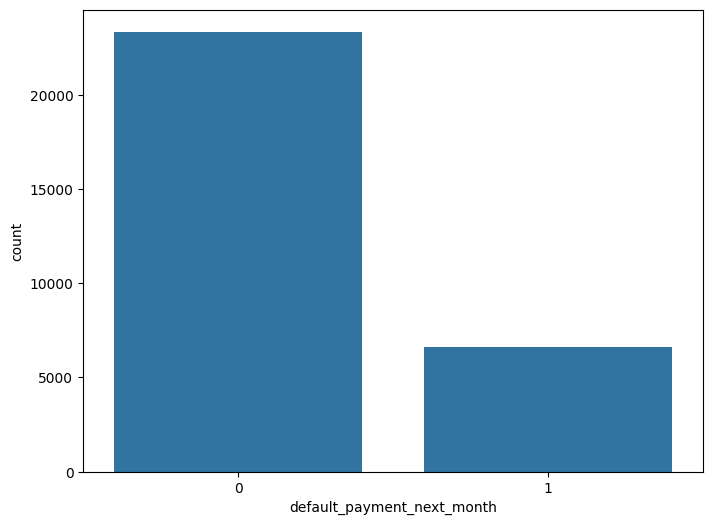

In [16]:
#plotting the count plot to vizualize the data distribution
#plot the count plot to check the data distribution
plt.figure(figsize=(8,6))
sns.countplot(x = 'default_payment_next_month', data = credit_df)
plt.show()

From the above data analysis we can say that

*  0 - Not Default
*  1 - Default
*  Defaulters are less than the Non Defaulters in the given dataset.

As we can see from above graph that both classes are not in proportion and we have imbalanced dataset. we need to do normalize the data in next step.

#**Analysis of Independent Variable:**

**Categorical Features**

We have few categorical features in our dataset that are

*  sex
*  education
*  marraige

Categorical variables are qualitative data in which the values are assigned to a set of distinct groups or categories. These groups may consist of alphabetic (e.g., male, female) or numeric labels (e.g., male = 0, female = 1) that do not contain mathematical information beyond the frequency counts related to group membership.

Let'Check how they are related with out target class.

SEX

*  1 - Male
*  2 - Female

In [17]:
# counts the SEX variable data set
credit_df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

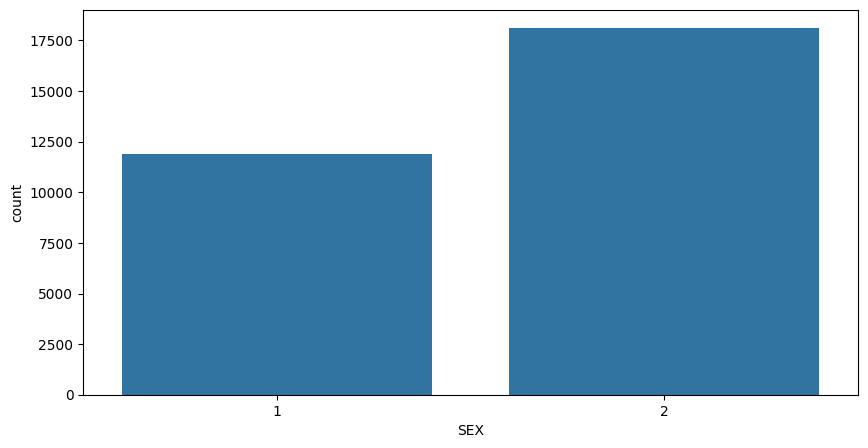

In [18]:
#plotting the count plot to vizualize the data distribution
plt.figure(figsize=(10,5))
sns.countplot(x = 'SEX', data = credit_df)
plt.show()

From the above data analysis we can say that

*  1 - Male
*  2 - Female

Number of Male credit holder is less than Female.

Education

*1 = graduate school*
*2 = university*
*3 = high school*
*4 = others*

In [19]:
# counts the education  data set variable data set
credit_df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

'EDUCATION' column: Apart from 1,2 and 3 all others will be 4 i.e. 'others'. As only 4 unique values are described in the variable description.

In [20]:
# Change values 4, 5, 6 to 0 and define 0 as 'others'
# 1=graduate school, 2=university, 3=high school, 0=others

credit_df["EDUCATION"] = credit_df["EDUCATION"].replace({0:4,5:4,6:4})
credit_df["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

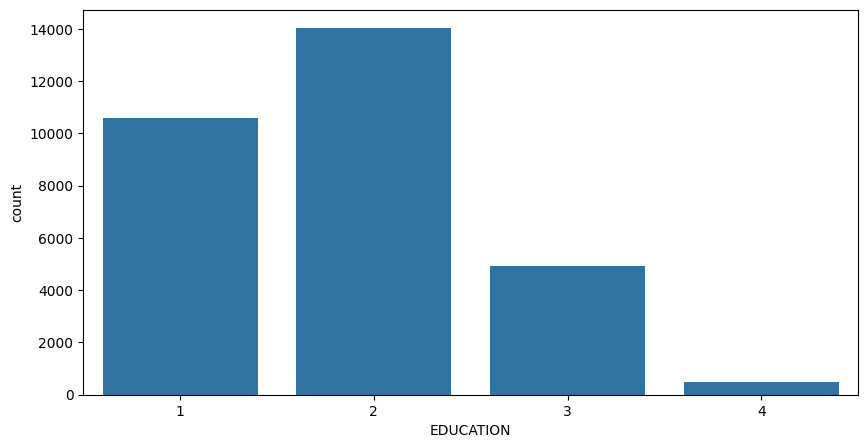

In [21]:
#plotting the count plot to vizualize the data distribution
plt.figure(figsize=(10,5))
sns.countplot(x = 'EDUCATION', data = credit_df)
plt.show()

From the above data analysis we can say that

*  More number of credit holders are university students followed by Graduates and then High school students.

###<b>Marriage

####1 = married
####2 = single
####3= others

In [22]:
# From dataset description: MARRIAGE: Marital status (1=married, 2=single, 3=others), but there is also 0

credit_df["MARRIAGE"].unique()

array([1, 2, 3, 0])

In [23]:
# counts the education  data set
credit_df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [24]:
# How many customers had "MARRIAGE" status as 0?

credit_df["MARRIAGE"].value_counts(normalize=True)

2    0.532133
1    0.455300
3    0.010767
0    0.001800
Name: MARRIAGE, dtype: float64

'MARRIAGE' column: what does 0 mean in 'MARRIAGE'? Since there are only 0.18% (or 54) observations of 0, we will combine 0 and 3 in one value as 'others'.

In [25]:
# Combine 0 and 3 by changing the value 0 into others

credit_df["MARRIAGE"] = credit_df["MARRIAGE"].replace({0:3})
credit_df["MARRIAGE"].value_counts(normalize=True)

2    0.532133
1    0.455300
3    0.012567
Name: MARRIAGE, dtype: float64

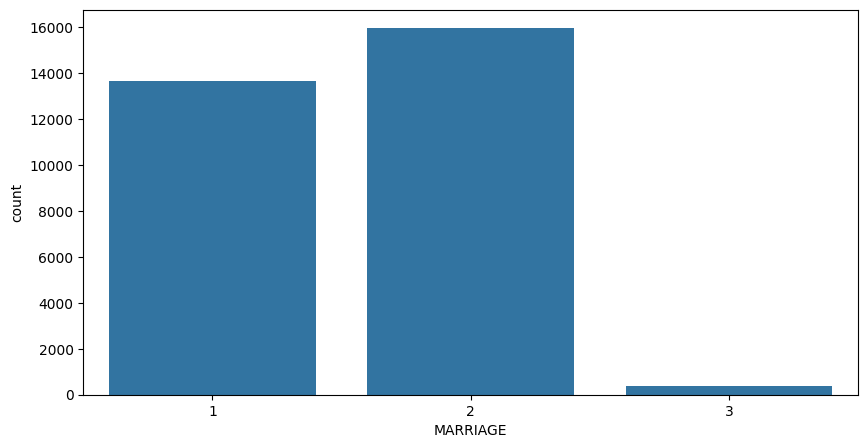

In [26]:
#plotting the count plot to vizualize the data distribution
plt.figure(figsize=(10,5))
sns.countplot(x = 'MARRIAGE', data = credit_df)
plt.show()

From the above data analysis we can say that

* 1 - married
* 2 - single
* 3 - others

More number of credit cards holder are Single

Continuous Variable **AGE**

A continuous variable is defined as a variable which can take an uncountable set of values or infinite set of values. For instance, if a variable over a non-empty range of the real numbers is continuous, then it can take on any value in that range.

Age is a continuous variable as it is not an age bracket. Generally speaking, we should treat age as a quantitative variable, assuming we have the actual ages and not age brackets.

Plotting graph of number of ages of all people with credit card irrespective of gender.

In [27]:
# counts the education  data set
credit_df['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64

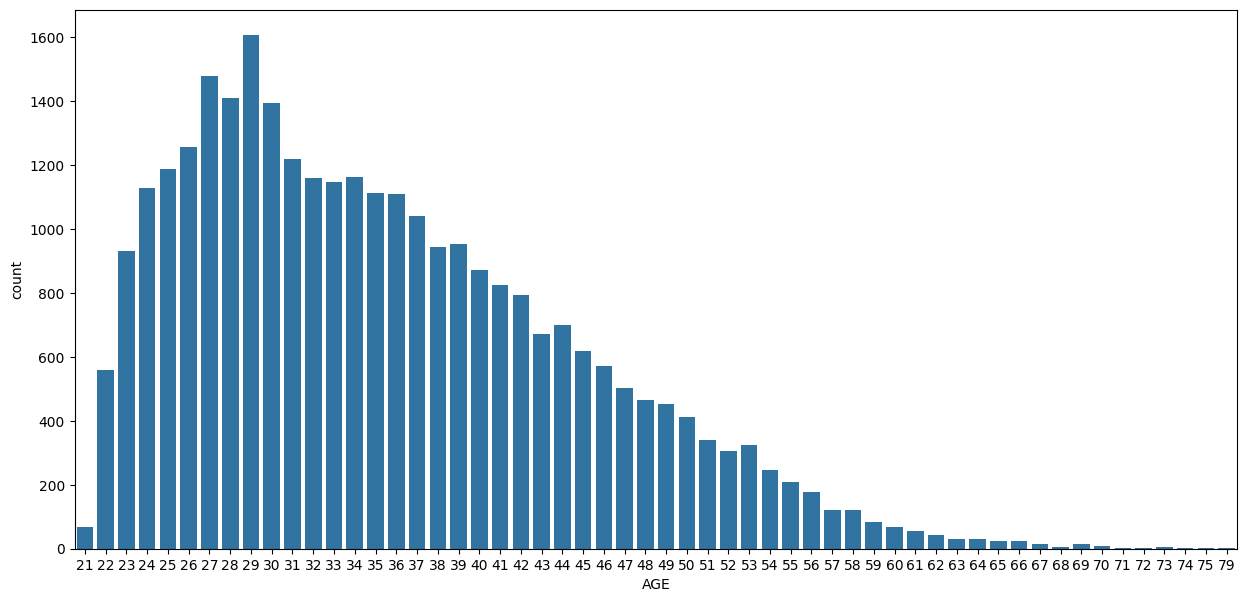

In [28]:
#plotting the count plot to vizualize the data distribution
plt.figure(figsize=(15,7))
sns.countplot(x = 'AGE',data = credit_df)
plt.show()

From the above data analysis we can say that

*  We can see more number of credit cards holder age are between 25-30 years old.

*  Age above 60 years old rarely uses the credit card.

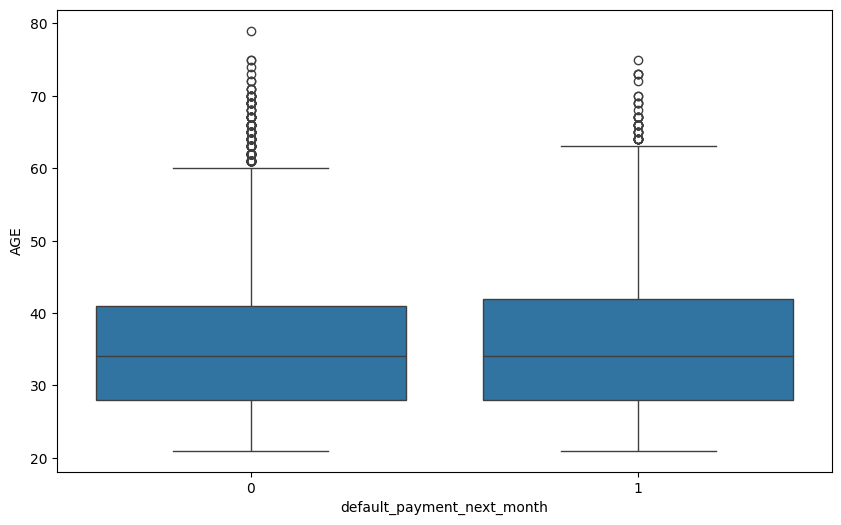

In [29]:
#plotting the box plot to check for age outliers
plt.figure(figsize=(10,6))
ax = sns.boxplot(x="default_payment_next_month", y="AGE", data=credit_df)

**Numerical features**

What is Numerical Data

*  Numerical data is a data type expressed in numbers, rather than natural language description. Sometimes called quantitative data, numerical data is always collected in number form. Numerical data differentiates itself from other number form data types with its ability to carry out arithmetic operations with these numbers.

<ipython-input-30-48d23eae7b82>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_df['LIMIT_BAL'],kde = True)  # Create a histogram plot with KDE


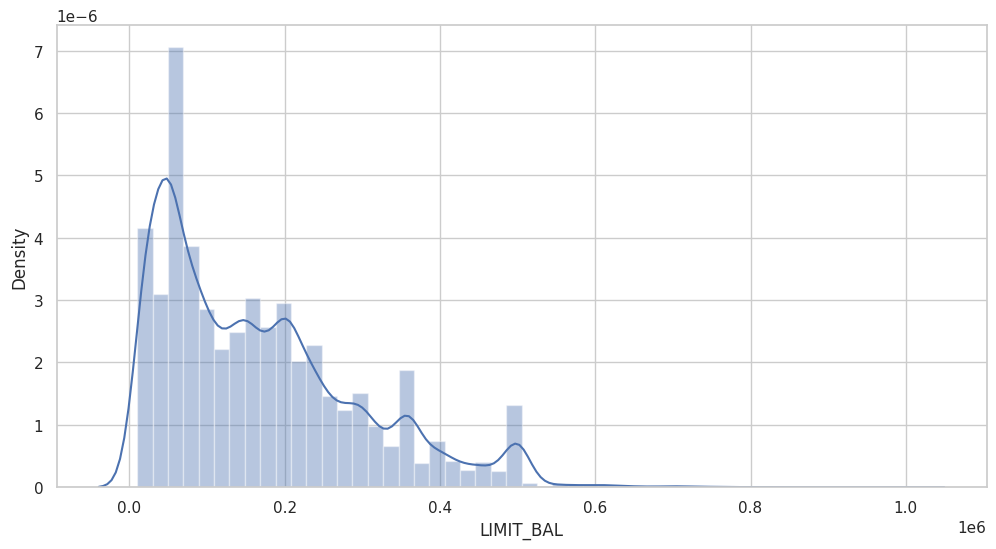

In [30]:
# Create a histogram with a KDE plot

plt.figure(figsize=(12, 6))  # Set the size of the plot
sns.set(style="whitegrid")    # Set the style of the seaborn plot
sns.distplot(credit_df['LIMIT_BAL'],kde = True)  # Create a histogram plot with KDE
plt.show()                    # Display the plot


From the above data analysis we can say that

*  Maximum number of customers are with credit limit in NT dollars is 10,000. Maximum amount of given credit in NT dollars is 50,000 followed by 30,000 and 20,000.

<Axes: xlabel='default_payment_next_month', ylabel='LIMIT_BAL'>

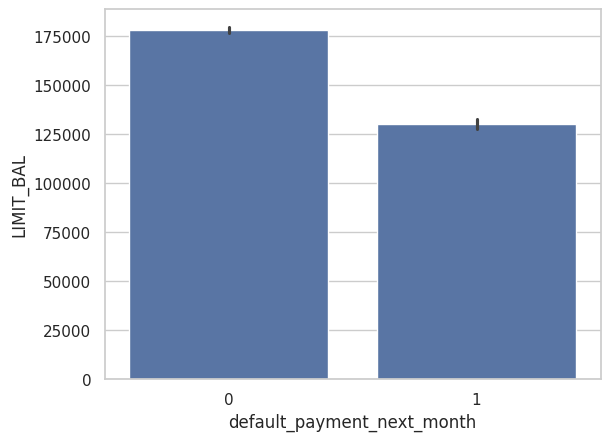

In [31]:
#plotting the bar plot to vizualize the data distribution of total credit limit of defaulter's next month
sns.barplot(x='default_payment_next_month', y='LIMIT_BAL', data=credit_df)

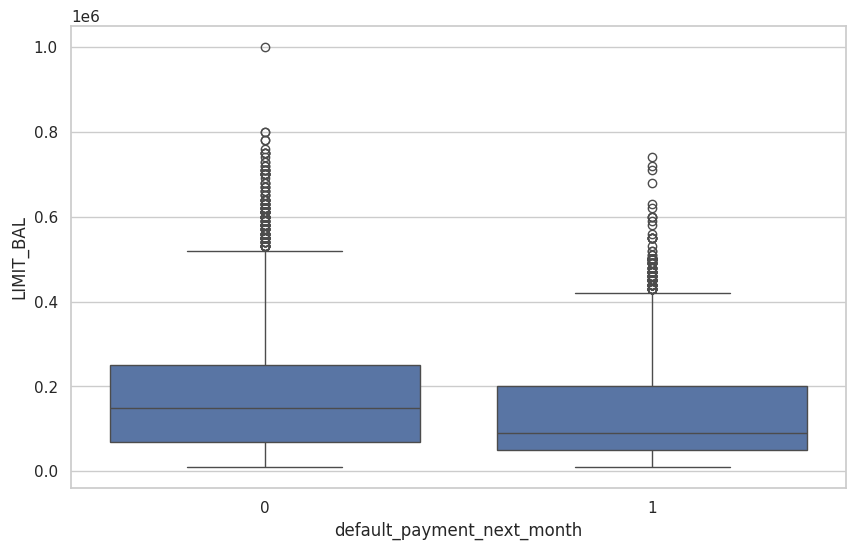

In [32]:
#plotting the box plot to check for credit limit oultiers
plt.figure(figsize=(10,6))
ax = sns.boxplot(x="default_payment_next_month", y="LIMIT_BAL", data=credit_df)

#**Renaming columns**

In [33]:
#renaming columns

credit_df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
credit_df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
credit_df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [34]:
#check details about the data set
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_SEPT                    30000 non-null  int64
 7   PAY_AUG                     30000 non-null  int64
 8   PAY_JUL                     30000 non-null  int64
 9   PAY_JUN                     30000 non-null  int64
 10  PAY_MAY                     30000 non-null  int64
 11  PAY_APR                     30000 non-null  int64
 12  BILL_AMT_SEPT               30000 non-null  int64
 13  BILL_AMT_AUG                30000 non-null  int64
 14  BILL_A

**Total Bill Amount**

What does SNS Pairplot do?

*  pairplot. Plot pairwise relationships in a dataset. By default, this function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column.

In [35]:
#assign the bill amount variable to a single variable
total_bill_amnt_df = credit_df[['BILL_AMT_SEPT',	'BILL_AMT_AUG',	'BILL_AMT_JUL',	'BILL_AMT_JUN',	'BILL_AMT_MAY',	'BILL_AMT_APR']]

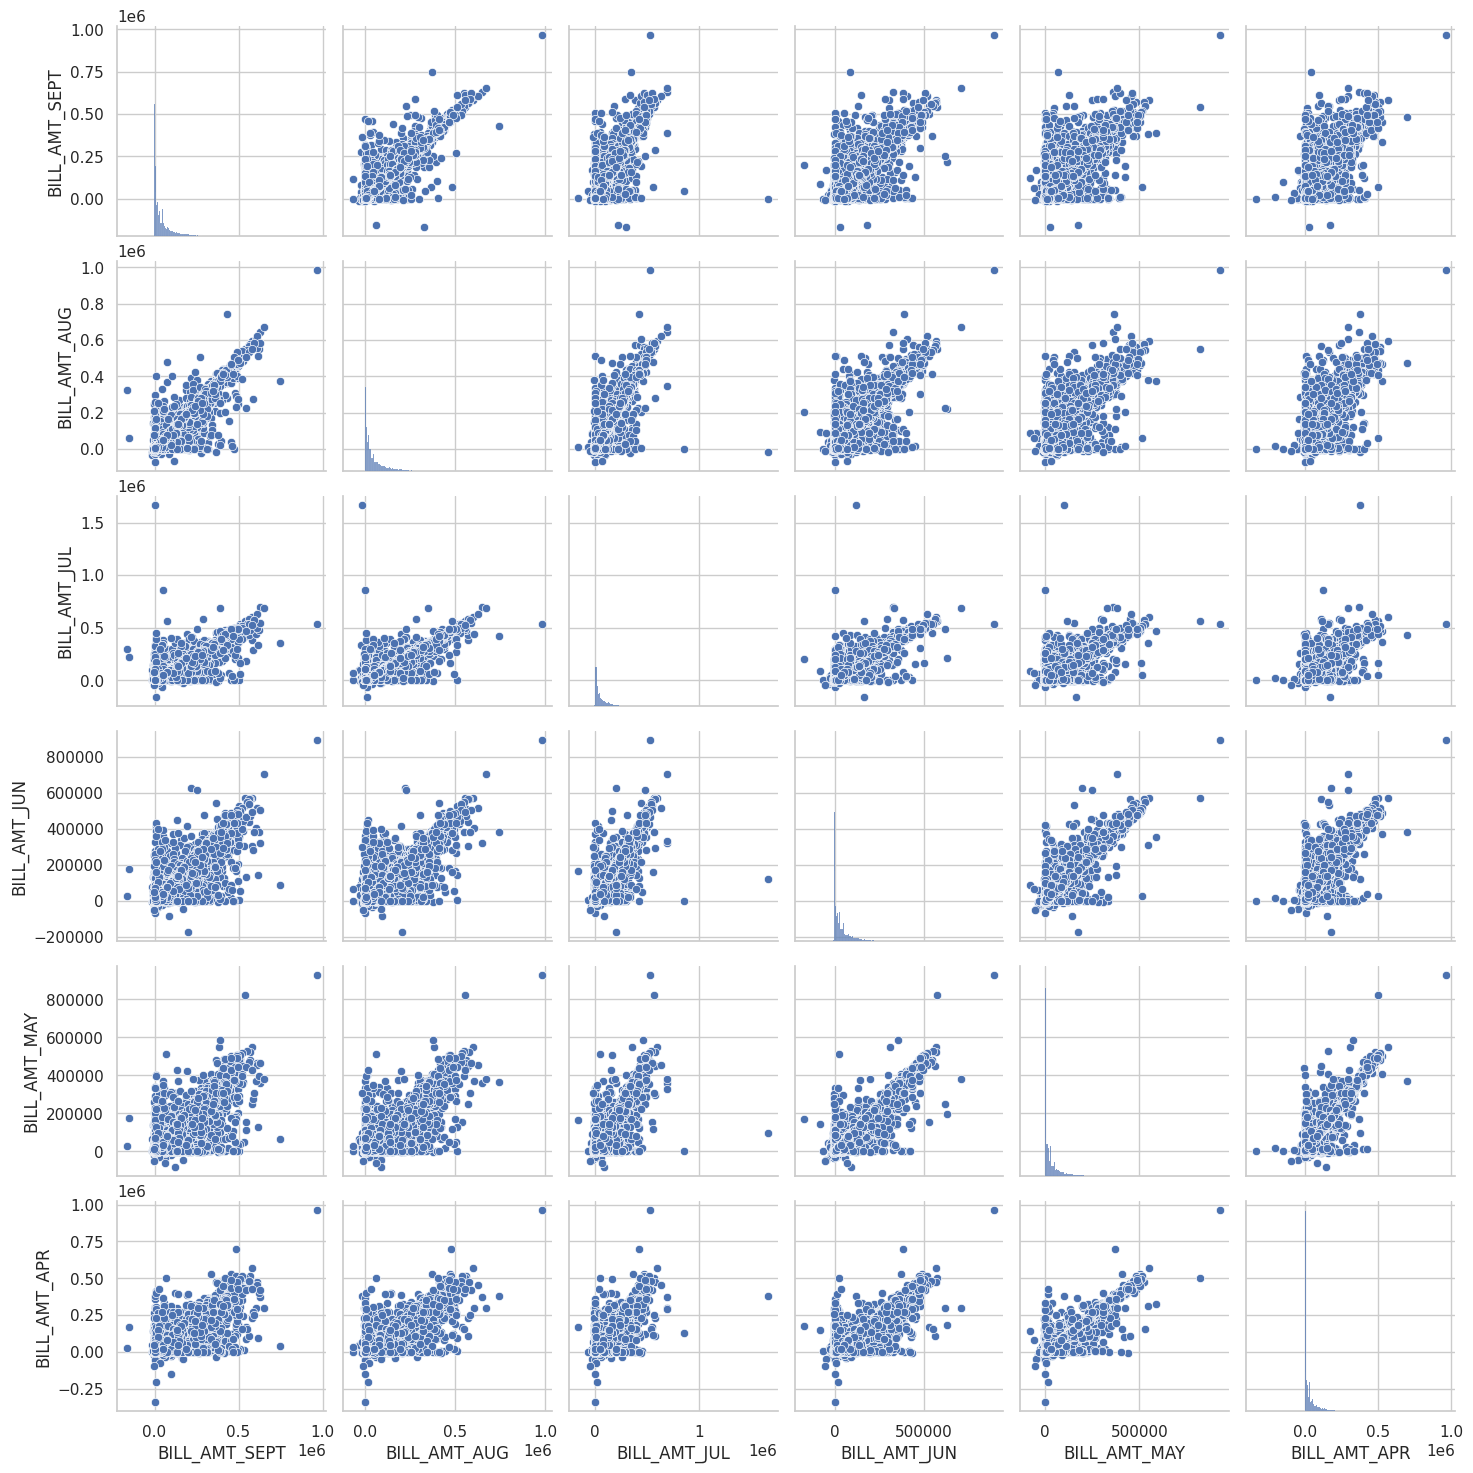

In [36]:
#plotting the pair plot for bill amount
sns.pairplot(data = total_bill_amnt_df)

**Previous payment status**

###**Paid Amount**

In [37]:
#assign the Paid Amount variable to a single variable
pay_amnt_df = credit_df[['PAY_AMT_SEPT',	'PAY_AMT_AUG',	'PAY_AMT_JUL',	'PAY_AMT_JUN',	'PAY_AMT_MAY',	'PAY_AMT_APR', 'default_payment_next_month']]

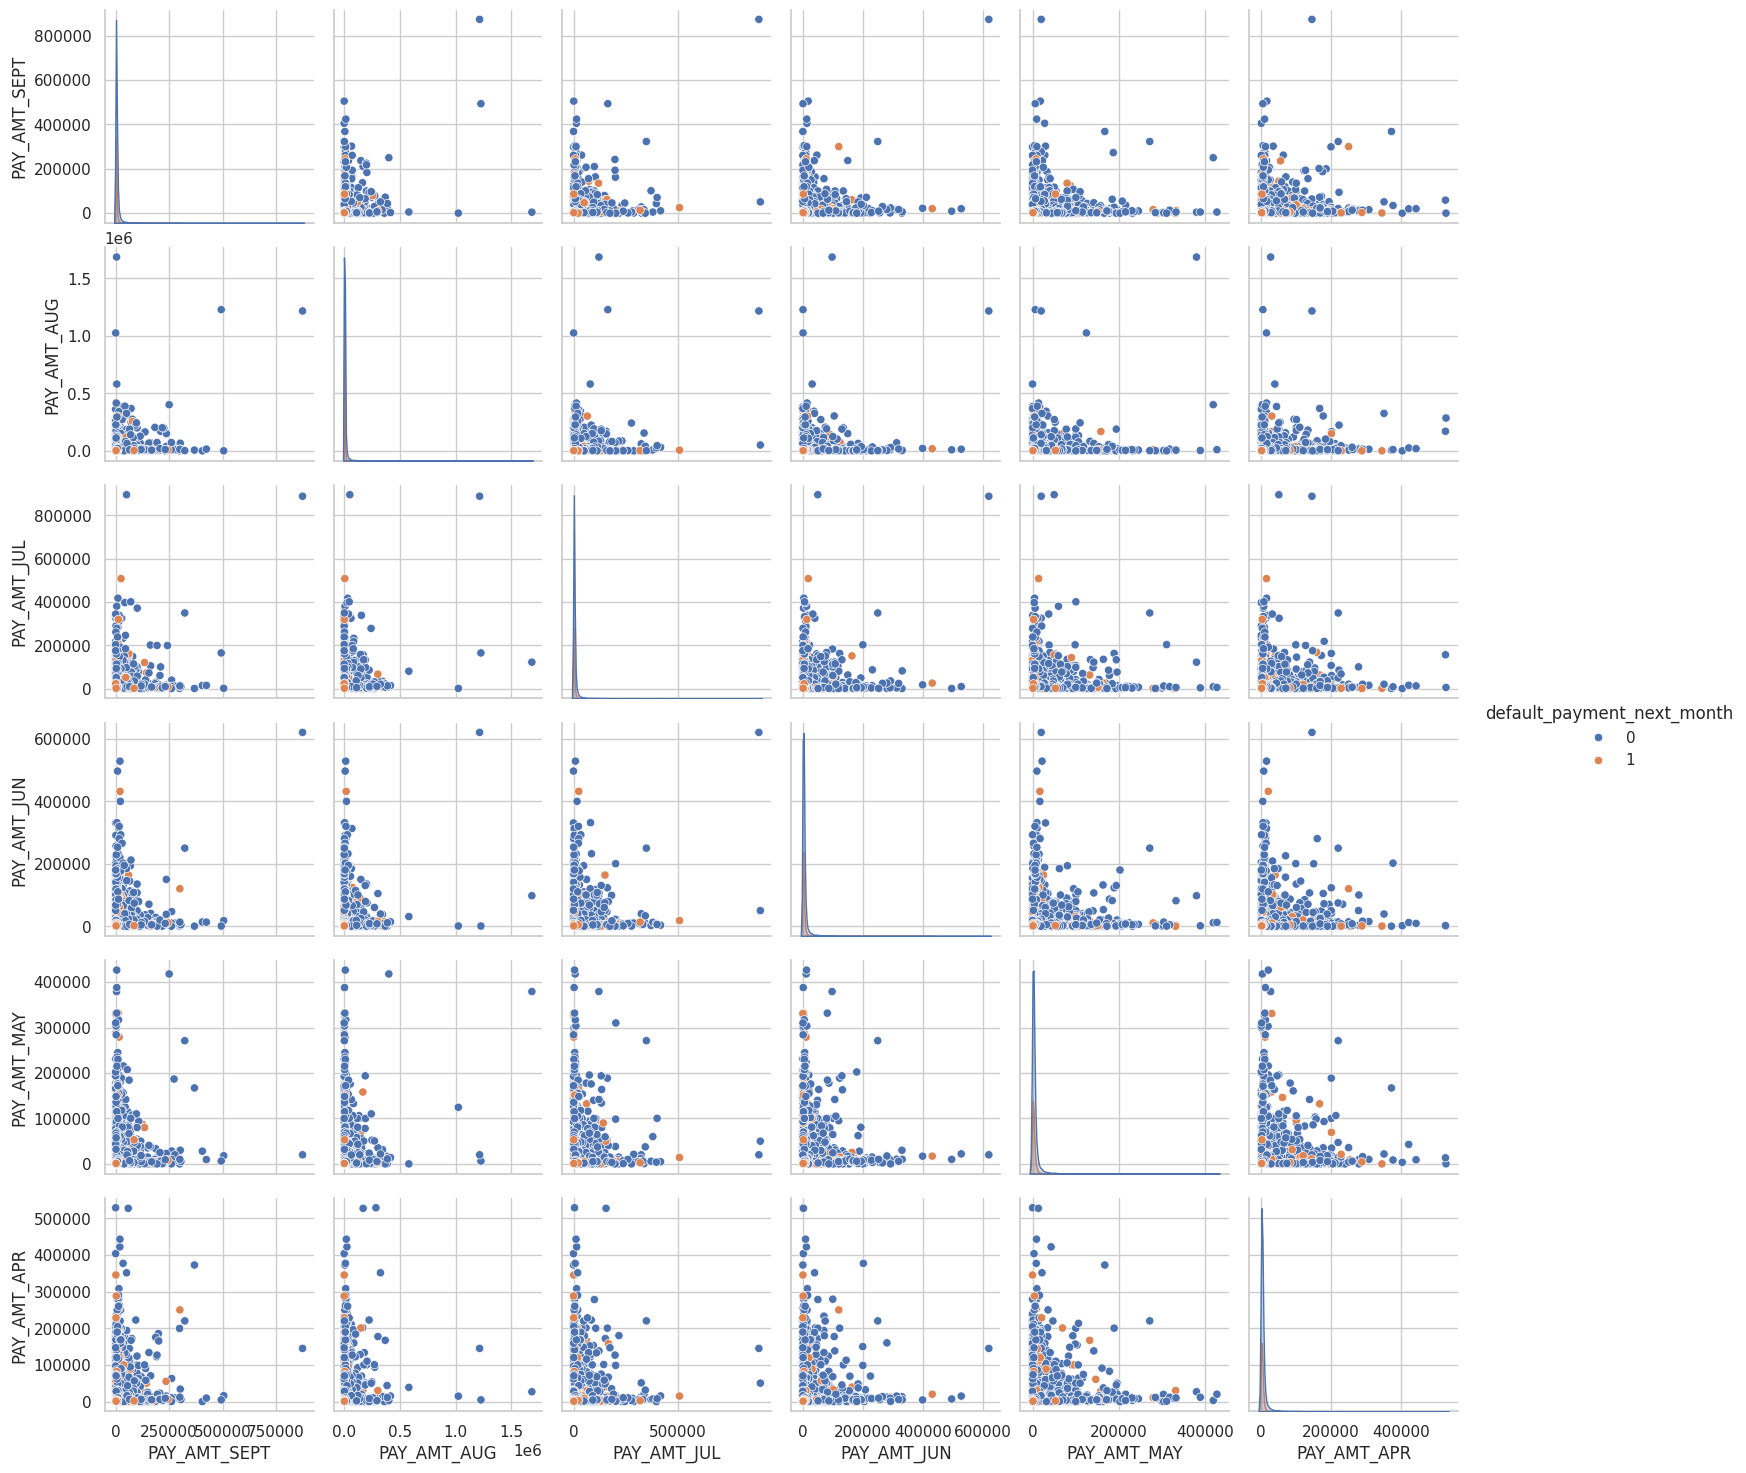

In [38]:
# #plotting the pair plot for paid amount
sns.pairplot(data = pay_amnt_df, hue='default_payment_next_month')

#**Bivariate Analysis**

what is bivariate analysis

*  Bivariate analysis is one of the simplest forms of quantitative analysis. It involves the analysis of two variables, for the purpose of determining the empirical relationship between them. Bivariate analysis can be helpful in testing simple hypotheses of association

#**Sex and default_payment_next_month**

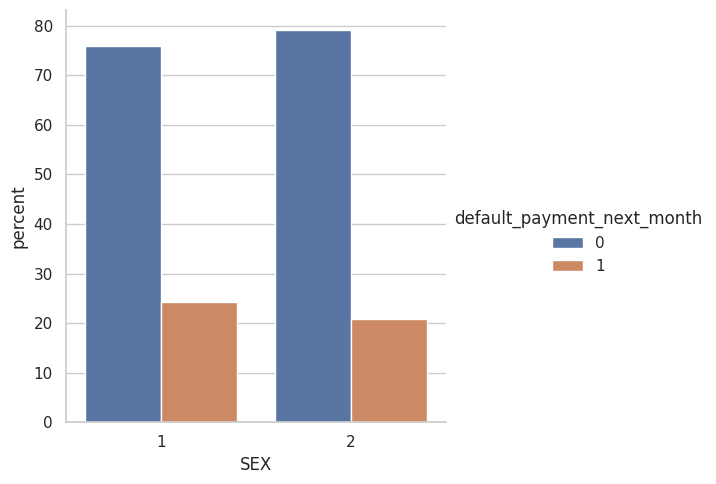

In [39]:
#plotting the cat plot to vizualize the data distribution related to the default_payment_next_month
x,y = 'SEX', 'default_payment_next_month'

credit_df_SD = credit_df.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index()

sns.catplot(credit_df_SD, x=x, y = 'percent', hue = y, kind = 'bar')

It is evident from the above graph that the number of defaulter have high proportion of males.

**Education and default_payment_next_month**

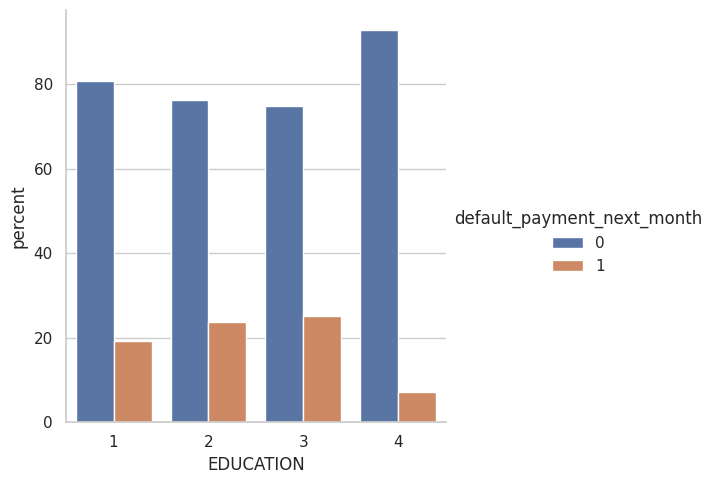

In [40]:
#plotting the cat plot to vizualize the data distribution related to the default_payment_next_month
x,y = 'EDUCATION', 'default_payment_next_month'

credit_df_SD = credit_df.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index()

sns.catplot(credit_df_SD, x=x, y = 'percent', hue = y, kind = 'bar')

From the above plot it is clear that those people who are other students have higher default payment wrt graduates and university people



**Marriage and default_payment_next_month**

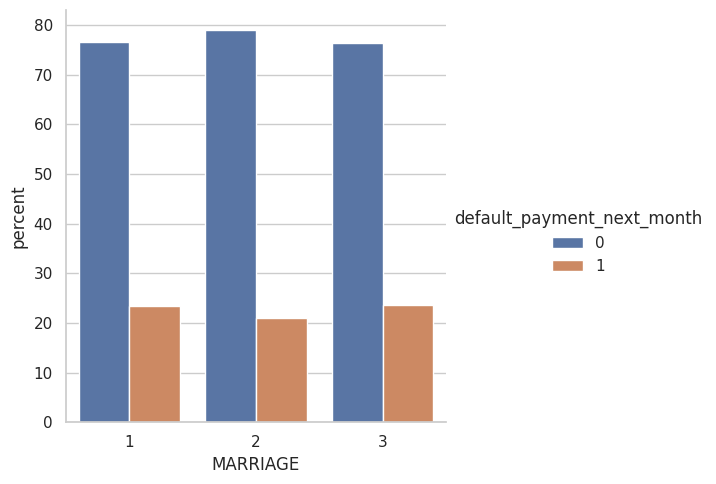

In [41]:
#plotting the cat plot to vizualize the data distribution related to the default_payment_next_month
x,y = 'MARRIAGE', 'default_payment_next_month'

credit_df_SD = credit_df.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index()

sns.catplot(credit_df_SD, x=x, y = 'percent', hue = y, kind = 'bar')

High defaulter rate when it comes to others

**Age and default_payment_next_month**

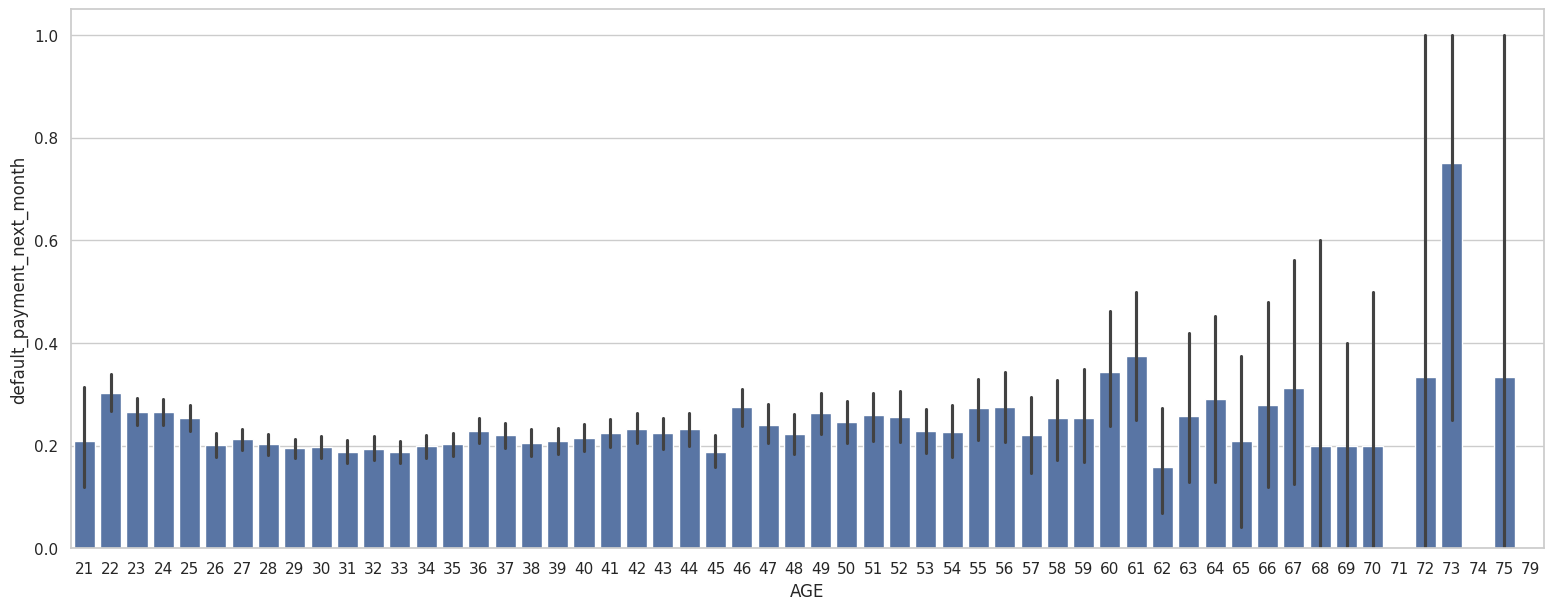

In [42]:
#plotting the bar plot to vizualize the data distribution related to the default_payment_next_month
plt.figure(figsize=(19,7))
sns.barplot(x = 'AGE', y = 'default_payment_next_month', data = credit_df)

plt.show()

Slightly higher defaulter rate in 60's.

#**Checking of Correlation between variables**

*  We check correletion betweeen variables using Correlation heatmap, it is graphical representation of correlation matrix representing correlation between different variables.

<Axes: >

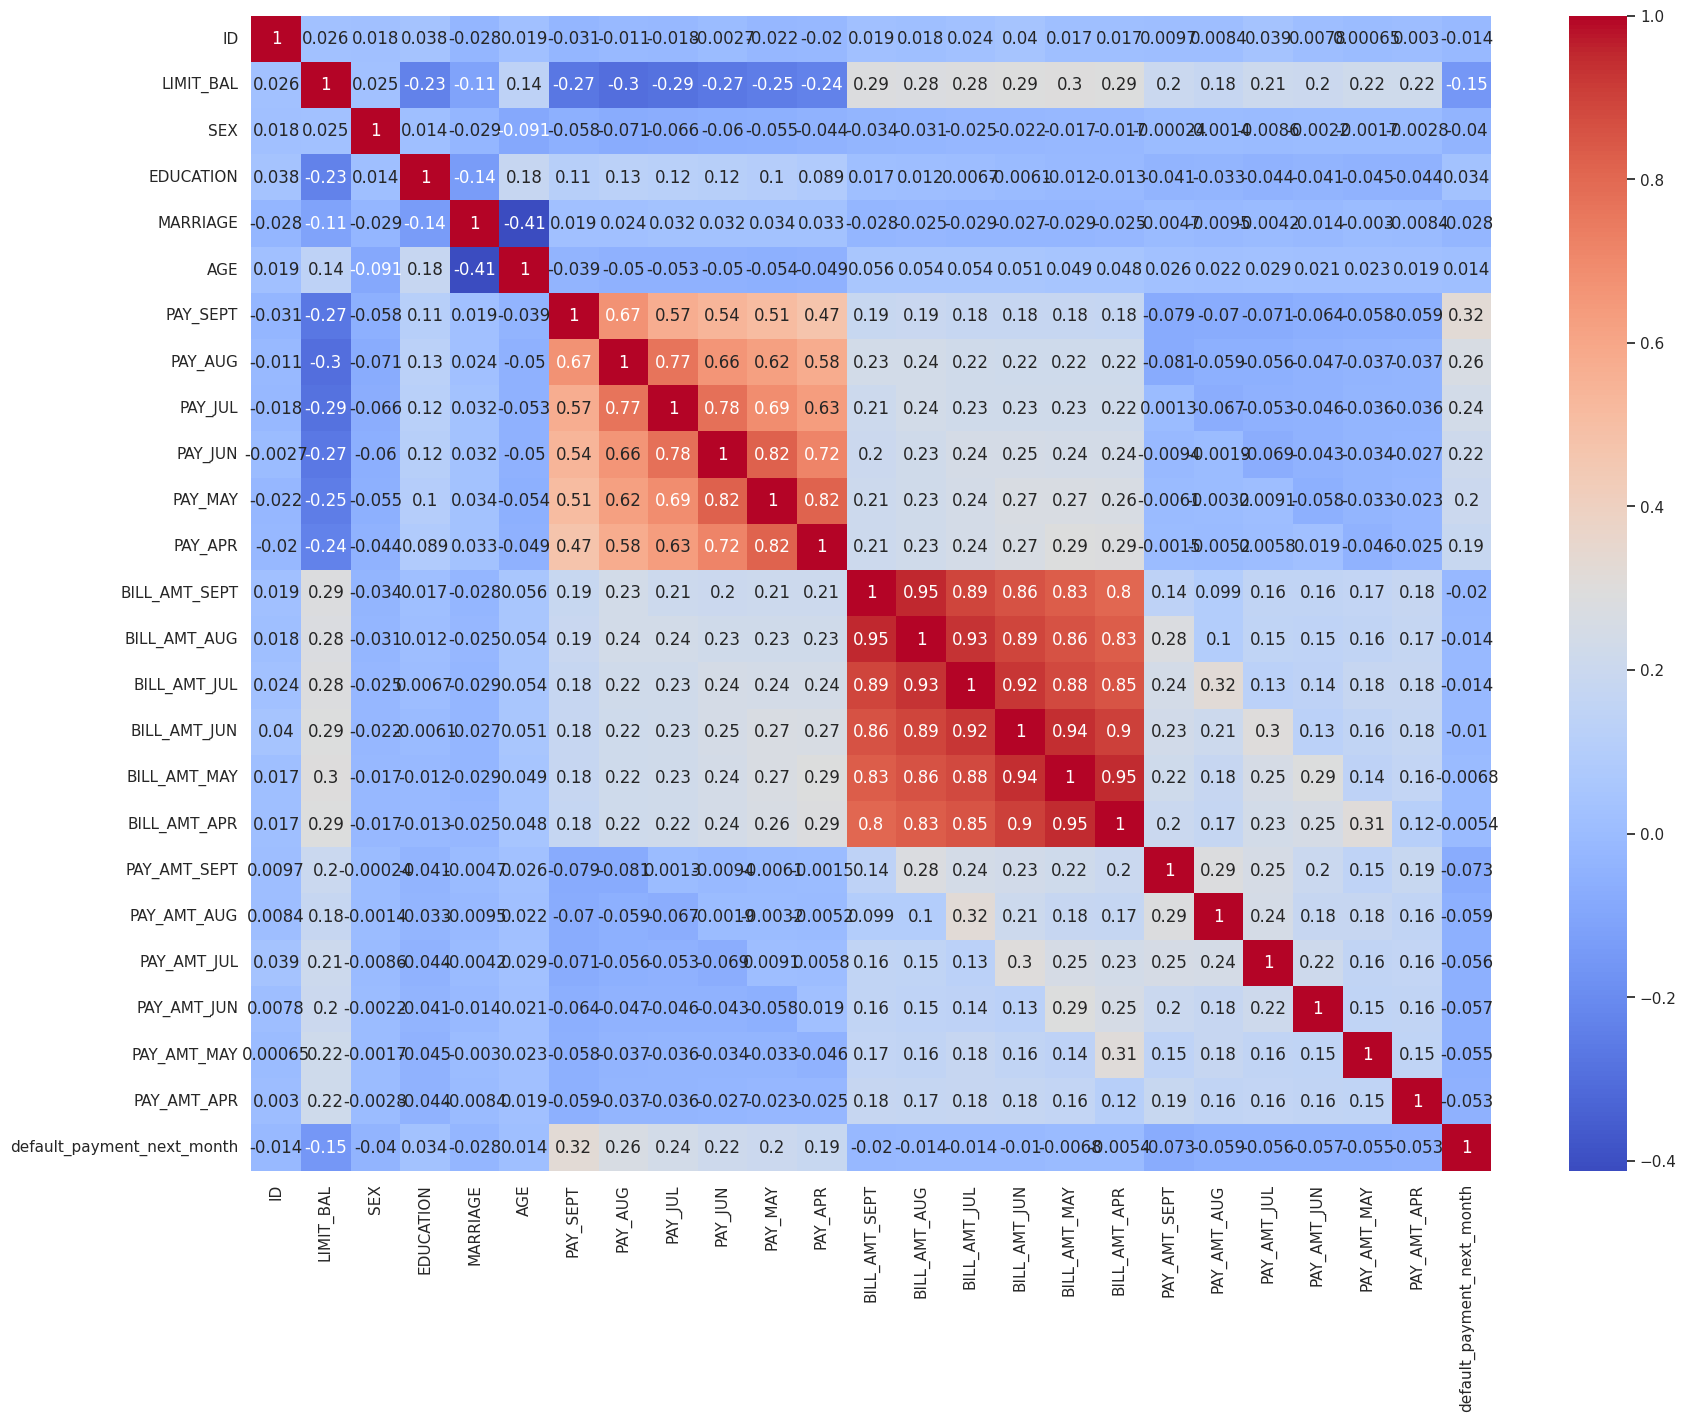

In [43]:
##plotting the heatmap
plt.figure(figsize=(20,15))
sns.heatmap(credit_df.corr(),annot=True,cmap="coolwarm")

It seems from the above graph is there are some negatively correlated feature like age but we cannot blindly remove this feature because it could be important feature for prediction.

ID is unimportant and it has no role in prediction so we will remove it.

#**SMOTE**

*  In our data set we have Imbalanced Data Distribution in our dependent variable, it generally happens when observations in one of the class are much higher i.e not defaulter or lower than the other classes i.e defaulter.

*  As Machine Learning algorithms tend to increase accuracy by reducing the error, they do not consider the class distribution.

*  Standard ML techniques such as Decision Tree and Logistic Regression have a bias towards the majority class, and they tend to ignore the minority class. They tend only to predict the majority class, hence, having major misclassification of the minority class in comparison with the majority class. In more technical words, if we have imbalanced data distribution in our dataset then our model becomes more prone to the case when the minority class has a negligible or very lesser recall.

**SMOTE**

*  SMOTE (Synthetic Minority Oversampling Technique) – Oversampling is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them.

In [44]:
from imblearn.over_sampling import SMOTE

# Create an instance of the SMOTE (Synthetic Minority Over-sampling Technique) class
# This object will be used to perform oversampling of the minority class in the dataset
smote = SMOTE()

# Creating Copy of the dataset
credit_df_copy = credit_df.copy()

#Defining x and y variable
X = credit_df_copy.drop('default_payment_next_month', axis=1)
y = credit_df_copy['default_payment_next_month']


# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X,y)

print('Original dataset shape', len(credit_df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 30000
Resampled dataset shape 46728


In [45]:
# balance_df = pd.DataFrame(x_smote, columns=columns)
balance_df = X_smote

In [128]:
# Assign SMOTE-generated target variable to balance_df.
balance_df['default_payment_next_month'] = y_smote

<Axes: xlabel='default_payment_next_month', ylabel='count'>

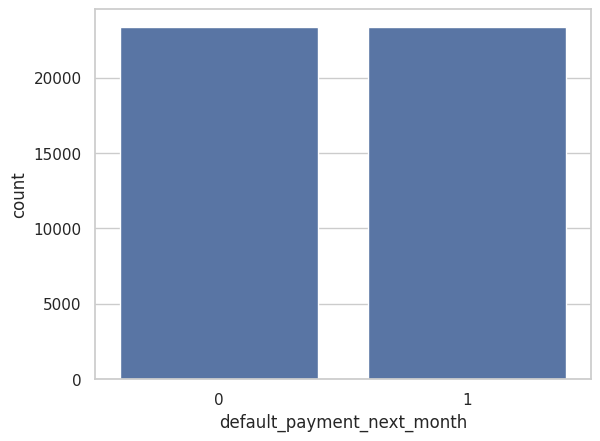

In [47]:
#plot the count plot after smote
sns.countplot(x = 'default_payment_next_month', data = balance_df)

#**Feature Engineering**

In [136]:
#save a copy file in other variable
credit_df_copy = balance_df.copy()

In [137]:
#assign the sum of payment value in one
credit_df_copy['Net_Payment_Status'] = credit_df_copy['PAY_SEPT'] + credit_df_copy['PAY_AUG'] + credit_df_copy['PAY_JUL'] + credit_df_copy['PAY_JUN'] + credit_df_copy['PAY_MAY'] + credit_df_copy['PAY_APR']

In [138]:
#check the correlation by using mean
credit_df_copy.groupby('default_payment_next_month')['Net_Payment_Status'].mean()

default_payment_next_month
0   -1.980140
1    1.675484
Name: Net_Payment_Status, dtype: float64

<Axes: xlabel='default_payment_next_month', ylabel='Net_Payment_Status'>

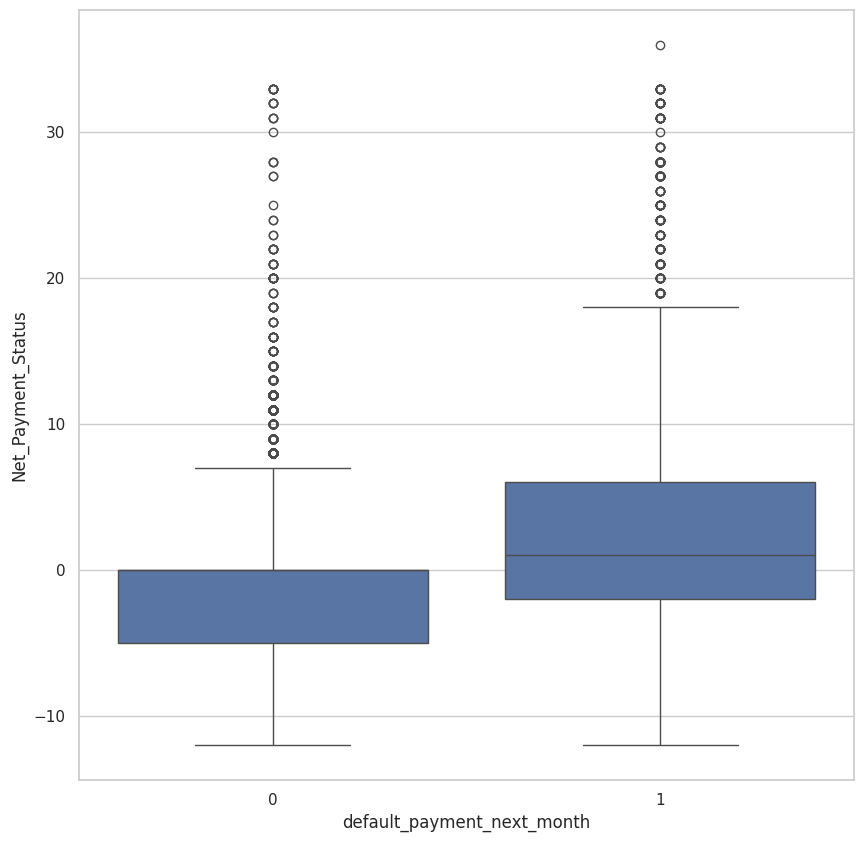

In [139]:
#plotting the box plot
plt.figure(figsize=(10,10))
sns.boxplot(data = credit_df_copy, x = 'default_payment_next_month', y = 'Net_Payment_Status' )

In [140]:
#create a new column due by calculating the sum of total bill amount substract it from the total amont paid
credit_df_copy['Dues'] = (credit_df_copy['BILL_AMT_APR']+credit_df_copy['BILL_AMT_MAY']+credit_df_copy['BILL_AMT_JUN']+credit_df_copy['BILL_AMT_JUL']+credit_df_copy['BILL_AMT_SEPT'])-(credit_df_copy['PAY_AMT_APR']+credit_df_copy['PAY_AMT_MAY']+credit_df_copy['PAY_AMT_JUN']+credit_df_copy['PAY_AMT_JUL']+credit_df_copy['PAY_AMT_AUG']+credit_df_copy['PAY_AMT_SEPT'])

In [141]:
#check the mean to calculate the correletion
credit_df_copy.groupby('default_payment_next_month')['Dues'].mean()

default_payment_next_month
0    187742.051532
1    193858.088726
Name: Dues, dtype: float64

In [142]:
# Replace numeric codes with corresponding categorical labels for 'SEX', 'EDUCATION', and 'MARRIAGE' columns.
credit_df_copy.replace({'SEX': {1: 'MALE', 2: 'FEMALE'},
                        'EDUCATION': {1: 'graduate school', 2: 'university', 3: 'high school', 4: 'others'},
                        'MARRIAGE': {1: 'married', 2: 'single', 3: 'others'}}, inplace=True)

In [143]:
#final data set
credit_df_copy.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default_payment_next_month,Net_Payment_Status,Dues
0,1,20000,FEMALE,university,married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,-2,3913
1,2,120000,FEMALE,university,single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,3,10352
2,3,90000,FEMALE,university,single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,76608
3,4,50000,FEMALE,university,married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,174713
4,5,50000,MALE,university,married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,-2,44620


#**One Hot Encoding**
*  One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

*  here we perform one hot encoding on 'EDUCATION','MARRIAGE','PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR'

In [144]:
#get dummies
credit_df_copy = pd.get_dummies(credit_df_copy,columns=['EDUCATION','MARRIAGE'])
credit_df_copy.head()

,ID,LIMIT_BAL,SEX,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default_payment_next_month,Net_Payment_Status,Dues,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_others,EDUCATION_university,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single
0,1,20000,FEMALE,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,-2,3913,0,0,0,1,1,0,0
1,2,120000,FEMALE,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,3,10352,0,0,0,1,0,0,1
2,3,90000,FEMALE,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,76608,0,0,0,1,0,0,1
3,4,50000,FEMALE,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,174713,0,0,0,1,1,0,0
4,5,50000,MALE,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,-2,44620,0,0,0,1,1,0,0


In [145]:
#get dummies
credit_df_copy = pd.get_dummies(credit_df_copy, columns = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR'], drop_first = True )


In [146]:
# LABEL ENCODING FOR SEX
encoders_nums = { "SEX":{"FEMALE": 0, "MALE": 1}}
credit_df_copy = credit_df_copy.replace(encoders_nums)

In [147]:
# Drop the 'ID' column from the DataFrame.
credit_df_copy.drop('ID', axis=1, inplace=True)

In [148]:
# Retrieve the column names of the DataFrame.
credit_df_copy.columns

Index(['LIMIT_BAL', 'SEX', 'AGE', 'BILL_AMT_SEPT', 'BILL_AMT_AUG',
       'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR',
       'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN',
       'PAY_AMT_MAY', 'PAY_AMT_APR', 'default_payment_next_month',
       'Net_Payment_Status', 'Dues', 'EDUCATION_graduate school',
       'EDUCATION_high school', 'EDUCATION_others', 'EDUCATION_university',
       'MARRIAGE_married', 'MARRIAGE_others', 'MARRIAGE_single', 'PAY_SEPT_-1',
       'PAY_SEPT_0', 'PAY_SEPT_1', 'PAY_SEPT_2', 'PAY_SEPT_3', 'PAY_SEPT_4',
       'PAY_SEPT_5', 'PAY_SEPT_6', 'PAY_SEPT_7', 'PAY_SEPT_8', 'PAY_AUG_-1',
       'PAY_AUG_0', 'PAY_AUG_1', 'PAY_AUG_2', 'PAY_AUG_3', 'PAY_AUG_4',
       'PAY_AUG_5', 'PAY_AUG_6', 'PAY_AUG_7', 'PAY_AUG_8', 'PAY_JUL_-1',
       'PAY_JUL_0', 'PAY_JUL_1', 'PAY_JUL_2', 'PAY_JUL_3', 'PAY_JUL_4',
       'PAY_JUL_5', 'PAY_JUL_6', 'PAY_JUL_7', 'PAY_JUL_8', 'PAY_JUN_-1',
       'PAY_JUN_0', 'PAY_JUN_1', 'PAY_JUN_2', 'PAY_JUN_3', 'P

In [149]:
# Retrieve the shape (number of rows and columns) of the DataFrame.
credit_df_copy.shape

(46728, 85)

In [150]:
# Display the first few rows of the DataFrame.
credit_df_copy.head()

,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default_payment_next_month,Net_Payment_Status,Dues,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_others,EDUCATION_university,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single,PAY_SEPT_-1,PAY_SEPT_0,PAY_SEPT_1,PAY_SEPT_2,PAY_SEPT_3,PAY_SEPT_4,PAY_SEPT_5,PAY_SEPT_6,PAY_SEPT_7,PAY_SEPT_8,PAY_AUG_-1,PAY_AUG_0,PAY_AUG_1,PAY_AUG_2,PAY_AUG_3,PAY_AUG_4,PAY_AUG_5,PAY_AUG_6,PAY_AUG_7,PAY_AUG_8,PAY_JUL_-1,PAY_JUL_0,PAY_JUL_1,PAY_JUL_2,PAY_JUL_3,PAY_JUL_4,PAY_JUL_5,PAY_JUL_6,PAY_JUL_7,PAY_JUL_8,PAY_JUN_-1,PAY_JUN_0,PAY_JUN_1,PAY_JUN_2,PAY_JUN_3,PAY_JUN_4,PAY_JUN_5,PAY_JUN_6,PAY_JUN_7,PAY_JUN_8,PAY_MAY_-1,PAY_MAY_0,PAY_MAY_1,PAY_MAY_2,PAY_MAY_3,PAY_MAY_4,PAY_MAY_5,PAY_MAY_6,PAY_MAY_7,PAY_MAY_8,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,20000,0,24,3913,3102,689,0,0,0,0,689,0,0,0,0,1,-2,3913,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,120000,0,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,3,10352,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,90000,0,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,76608,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,50000,0,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,174713,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,50000,1,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,-2,44620,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


#**Modeling**

#**Performance Metrics**
*  **Precision** is a good metric to use when the costs of false positive(FP) is high.

    **Precision = TP / (TP + FP)**

*  **Recall** is a good metric to use when the cost associated with false negative(FN) is high.

    **Recall = TP / (TP + FN)**

*  **F1-score** is a weighted average of precision and recall. Thus, it considers FP and FN. This metric is very useful when we have uneven class distribution, as it seeks a balance between precision and recall.

    **F1-score = 2 (precision recall) / (precision + recall)**

#**Note**
*  In this classification problem there is a high cost for the bank when a default credit card is predicted as non-default, since no actions can be taken. Thus, we will give recall more importance .

#**Import Packages for performing models**

In [63]:
#Import Packages
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc, classification_report
from sklearn.metrics import precision_recall_curve


## Scaling data with Standard Scaler

In [64]:
# Extract the target variable 'default_payment_next_month' into y_sm_en and the features into X_sm_en.
y_sm_en = credit_df_copy[['default_payment_next_month']]
X_sm_en = credit_df_copy.drop('default_payment_next_month', axis=1)

# Standardize the features using StandardScaler.
scaler = StandardScaler()
X_sm_en_sc = scaler.fit_transform(X_sm_en)

In [65]:
# Display the shape of the standardized feature matrix.
X_sm_en_sc.shape

(46728, 84)

In [66]:
# Display the shape of the target variable array.
y_sm_en.shape

(46728, 1)

#Train Test split

In [67]:
#split the data set
X_train, X_test, y_train, y_test = train_test_split(X_sm_en_sc, y_sm_en, test_size=0.33, random_state=42)

#**Implementing Logistic Regression**
Logistic Regression is one of the simplest algorithms which estimates the relationship between one dependent binary variable and independent variables, computing the probability of occurrence of an event. The regulation parameter C controls the trade-off between increasing complexity (overfitting) and keeping the model simple (underfitting). For large values of C, the power of regulation is reduced and the model increases its complexity, thus overfitting the data.

In [68]:
#Implementing the Logistic Regression

lr = LogisticRegression()
lr.fit(X_train,y_train)

#Predicting with train model
y_pred_class_train_lr =  lr.predict(X_train)
y_pred_class_test_lr = lr.predict(X_test)

# printing accuracy score
print('\naccuracy score - Train model : ', accuracy_score(y_train, y_pred_class_train_lr))
print('accuracy score - Train model : ', accuracy_score(y_test, y_pred_class_test_lr))

#Evaluating the model evaluaation metrics
print('\nClassification Report - Train Model: \n' ,classification_report(y_train, y_pred_class_train_lr))
print('\nClassification Report - Test Model: \n' ,classification_report(y_test, y_pred_class_test_lr))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



accuracy score - Train model :  0.7539847318491072
accuracy score - Train model :  0.7500162116594254

Classification Report - Train Model: 
               precision    recall  f1-score   support

           0       0.72      0.82      0.77     15668
           1       0.79      0.69      0.74     15639

    accuracy                           0.75     31307
   macro avg       0.76      0.75      0.75     31307
weighted avg       0.76      0.75      0.75     31307


Classification Report - Test Model: 
               precision    recall  f1-score   support

           0       0.72      0.81      0.76      7696
           1       0.79      0.69      0.73      7725

    accuracy                           0.75     15421
   macro avg       0.75      0.75      0.75     15421
weighted avg       0.75      0.75      0.75     15421



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Hyperparameter Tuning - Logistic Regression

*  GridSearchCV is a library function that is a member of sklearn's model_selection package. It helps to loop through predefined hyperparameters and fit our estimator (model) on your training set. So, in the end, we can select the best parameters from the listed hyperparameters.

In [69]:
#set the parmeter
param_grid = {'penalty':['l1','l2'], 'C':[1e-3,1e-2,1e-1,1,10,100,1e+3] }

#fit the parameter
lr_grid = GridSearchCV(estimator = lr,
                      param_grid = param_grid,
                      cv=3, verbose=3, scoring='accuracy', n_jobs = -1)
lr_grid.fit(X_train,y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
21 fits failed out of a total of 42.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000.0],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=3)

In [70]:
# Retrieve the optimal logistic regression classifier from the grid search.
optimal_lr_clf = lr_grid.best_estimator_

In [71]:
# Retrieve the best parameters found by grid search for logistic regression.
lr_grid.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [72]:
# Retrieve the best mean cross-validated score found by grid search for logistic regression.
lr_grid.best_score_

0.7516528977225457

In [73]:
# Predicted Probability for positive class
y_pred_prob_train_lr_tuned = optimal_lr_clf.predict_proba(X_train)[:,1]
y_pred_prob_test_lr_tuned = optimal_lr_clf.predict_proba(X_test)[:,1]
print(y_pred_prob_train_lr_tuned)
print(y_pred_prob_test_lr_tuned)

[0.37086682 0.99993405 0.02640531 ... 0.65616041 0.37113763 0.27924446]
[0.91235753 0.99999824 0.39779512 ... 0.99999986 0.15535682 0.18496914]


In [74]:
# Get the predicted classes
y_pred_class_train_lr_tuned= optimal_lr_clf.predict(X_train)
y_pred_class_test_lr_tuned = optimal_lr_clf.predict(X_test)
print(y_pred_class_train_lr_tuned)
print(y_pred_class_test_lr_tuned)

[0 1 0 ... 1 0 0]
[1 1 0 ... 1 0 0]


#**Model Evaluation**

In [75]:
# Get the accuracy scores
train_accuracy_lr = accuracy_score(y_pred_class_train_lr_tuned,y_train)
test_accuracy_lr = accuracy_score(y_pred_class_test_lr_tuned,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  0.7538889066342991
The accuracy on test data is  0.7502755982102328


In [76]:
# print the classification report
print('Classification report after Hyperparameter tuning - Train Model : \n', classification_report(y_pred_class_test_lr_tuned,y_test))
print('Classification report after Hyperparameter tuning - Test Model : \n', classification_report(y_pred_class_test_lr_tuned,y_test))

Classification report after Hyperparameter tuning - Train Model : 
               precision    recall  f1-score   support

           0       0.81      0.72      0.76      8673
           1       0.69      0.79      0.73      6748

    accuracy                           0.75     15421
   macro avg       0.75      0.75      0.75     15421
weighted avg       0.76      0.75      0.75     15421

Classification report after Hyperparameter tuning - Test Model : 
               precision    recall  f1-score   support

           0       0.81      0.72      0.76      8673
           1       0.69      0.79      0.73      6748

    accuracy                           0.75     15421
   macro avg       0.75      0.75      0.75     15421
weighted avg       0.76      0.75      0.75     15421



In [77]:
#print the accuracy,precission,recall,f1,roc_score
test_accuracy_lr = accuracy_score(y_pred_class_test_lr_tuned,y_test)
test_precision_score_lr = precision_score(y_pred_class_test_lr_tuned,y_test)
test_recall_score_lr = recall_score(y_pred_class_test_lr_tuned,y_test)
test_f1_score_lr = f1_score(y_pred_class_test_lr_tuned,y_test)

print("The accuracy on test data is ", test_accuracy_lr)
print("The precision on test data is ", test_precision_score_lr)
print("The recall on test data is ", test_recall_score_lr)
print("The f1 on test data is ", test_f1_score_lr)

The accuracy on test data is  0.7502755982102328
The precision on test data is  0.6875080906148867
The recall on test data is  0.7870480142264374
The f1 on test data is  0.7339183306847231


from the above evalution we get the results as below"

*  The accuracy on test data is 0.75

*  The precision on test data is 0.68

*  The recall on test data is 0.79

*  The f1 on test data is 0.73


We have implemented logistic regression and we getting f1-sore approx 73%. As we have imbalanced dataset, F1- score is better parameter. Let's go ahead with other models and see if they can yield better result.

#**Confusion Matrix**

Confusion Matrix is a performance measurement for machine learning classification problem where output can be two or more classes. It is a table with 4 different combinations of predicted and actual values.

In [78]:
# Get the confusion matrix for both train and test
cm_lr = confusion_matrix(y_test, y_pred_class_test_lr_tuned)
print(cm_lr)

[[6259 1437]
 [2414 5311]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

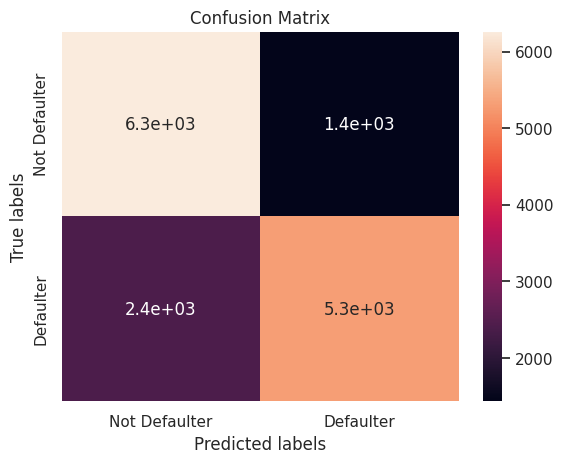

In [79]:
# Display a heatmap of the confusion matrix for logistic regression.
labels = ['Not Defaulter', 'Defaulter']
ax = plt.subplot()
sns.heatmap(cm_lr, annot=True, ax=ax)  # annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**ROC AUC curve**

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

*  True Positive Rate

*  False Positive Rate

AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve

In [80]:
# Predict the probability of positive class using the optimal logistic regression classifier on the test data.
y_tests_proba_lr = optimal_lr_clf.predict_proba(X_test)[:, 1]

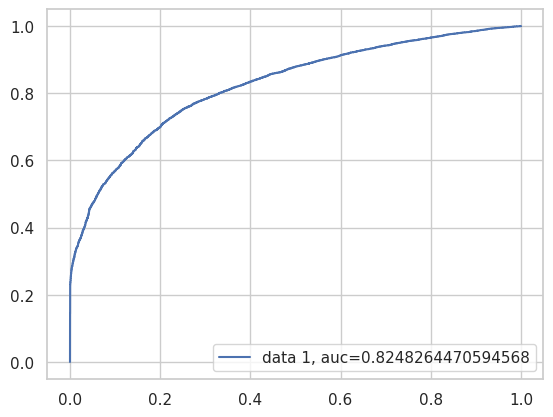

In [81]:
#plot the graph
y_test_proba_LR = y_tests_proba_lr
fpr, tpr, _ = roc_curve(y_test,  y_test_proba_LR)
auc = roc_auc_score(y_test, y_test_proba_LR)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#**Implementing RandomForest**
A random forest classifier. A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting

In [82]:
# Implementing the Random Forest

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

#Predicting with trained model
y_pred_class_train_RF = rf_clf.predict(X_train)
y_pred_class_test_RF = rf_clf.predict(X_test)

# printing accuracy score
print('\naccuracy score - Trained model : ', accuracy_score(y_train, y_pred_class_train_RF))
print('accuracy score - Tested model : ', accuracy_score(y_test, y_pred_class_test_RF))

#Evaluating the model evaluation metrics
print('\nClassification Report - Trained Model: \n' , classification_report(y_train, y_pred_class_train_RF))
print('Classification Report - Tested Model: \n' ,classification_report(y_test, y_pred_class_test_RF))

<ipython-input-82-f03d059d0b5a>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train,y_train)



accuracy score - Trained model :  0.9994569904494203
accuracy score - Tested model :  0.8299721159457882

Classification Report - Trained Model: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15668
           1       1.00      1.00      1.00     15639

    accuracy                           1.00     31307
   macro avg       1.00      1.00      1.00     31307
weighted avg       1.00      1.00      1.00     31307

Classification Report - Tested Model: 
               precision    recall  f1-score   support

           0       0.81      0.86      0.83      7696
           1       0.85      0.80      0.83      7725

    accuracy                           0.83     15421
   macro avg       0.83      0.83      0.83     15421
weighted avg       0.83      0.83      0.83     15421



We can see from above results that we are getting around 99% train accuracy and 84% for test accuracy which depicts that model is overfitting. However our f1-score is around 83%, which is not bad.

#Hyperparameter Tuning - Random Forest

In [83]:
#set the parmeter
param_grid = {'n_estimators': [100,150,200], 'max_depth': [10,20,30]}

# fit the parameter
grid_rf_clf = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_rf_clf.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy', verbose=3)

In [84]:
# Retrieve the best mean cross-validated score found by grid search for random forest classifier.
grid_rf_clf.best_score_

0.822659354492016

In [85]:
# Retrieve the best parameters found by grid search for random forest classifier.
grid_rf_clf.best_params_

{'max_depth': 30, 'n_estimators': 200}

In [86]:
# Retrieve the optimal random forest classifier from the grid search.
optimal_rf_clf = grid_rf_clf.best_estimator_

In [87]:
# Get the predicted classes
y_pred_class_train_RF_tuned = optimal_rf_clf.predict(X_train)
y_pred_class_test_RF_tuned = optimal_rf_clf.predict(X_test)

# Model Evaluation

In [88]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(y_train,y_pred_class_train_RF_tuned)
test_accuracy_rf = accuracy_score(y_test, y_pred_class_test_RF_tuned)

print("The accuracy of trained model is ", train_accuracy_rf)
print("The accuracy of tested model is ", test_accuracy_rf)

The accuracy of trained model is  0.9989139808988405
The accuracy of tested model is  0.8320472083522469


In [89]:
# print the classification report
print('Classification report of Trained model : \n', classification_report(y_train, y_pred_class_train_RF_tuned))
print('Classification report of Tested model : \n', classification_report(y_test, y_pred_class_test_RF_tuned))

Classification report of Trained model : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15668
           1       1.00      1.00      1.00     15639

    accuracy                           1.00     31307
   macro avg       1.00      1.00      1.00     31307
weighted avg       1.00      1.00      1.00     31307

Classification report of Tested model : 
               precision    recall  f1-score   support

           0       0.82      0.86      0.84      7696
           1       0.85      0.81      0.83      7725

    accuracy                           0.83     15421
   macro avg       0.83      0.83      0.83     15421
weighted avg       0.83      0.83      0.83     15421



In [90]:
#print the accuracy,precission,recall,f1,roc_score
test_accuracy_rf = accuracy_score(y_pred_class_test_RF_tuned,y_test)
test_precision_score_rf = precision_score(y_pred_class_test_RF_tuned,y_test)
test_recall_score_rf = recall_score(y_pred_class_test_RF_tuned,y_test)
test_f1_score_rf = f1_score(y_pred_class_test_RF_tuned,y_test)

print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)

The accuracy on test data is  0.8320472083522469
The precision on test data is  0.806084142394822
The recall on test data is  0.8507992895204263
The f1 on test data is  0.8278383408667908


After gridsearch we getting f1-sore approx 83%. As we have imbalanced dataset, F1- score is better parameter. Let's go ahead with other models and see if they can yield better result

#**Confusion Matrix**
Confusion Matrix is a performance measurement for machine learning classification problem where output can be two or more classes. It is a table with 4 different combinations of predicted and actual values.

In [91]:
# Get the confusion matrix for test data
cm_rf = confusion_matrix(y_test, y_pred_class_test_RF_tuned)
print(cm_rf)

[[6604 1092]
 [1498 6227]]


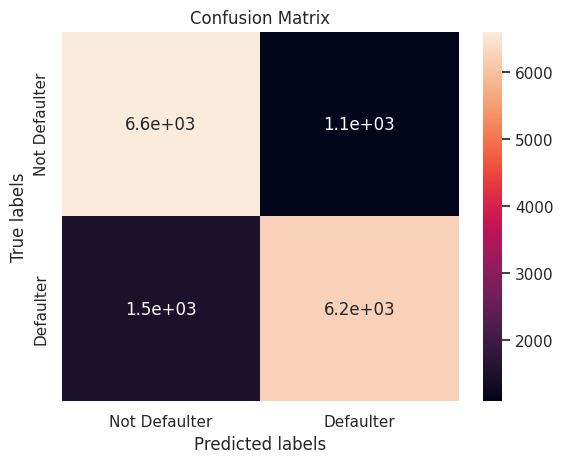

In [92]:
# Display a heatmap of the confusion matrix for random forest classifier.
labels = ['Not Defaulter', 'Defaulter']
ax = plt.subplot()
sns.heatmap(cm_rf, annot=True, ax=ax)  # annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

**ROC AUC curve**

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

*  True Positive Rate

*  False Positive Rate

AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve

In [93]:
# Predict the probability of positive class using the optimal random forest classifier on the test data.
y_tests_proba_rf = optimal_rf_clf.predict_proba(X_test)[:, 1]

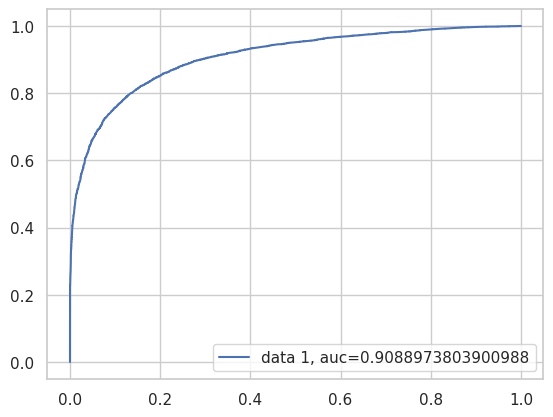

In [94]:
import sklearn.metrics as metrics

# Compute ROC curve and AUC score for random forest classifier.
y_test_proba_RF = y_tests_proba_rf
fpr, tpr, _ = metrics.roc_curve(y_test, y_test_proba_RF)
auc = metrics.roc_auc_score(y_test, y_test_proba_RF)

# Plot ROC curve.
plt.plot(fpr, tpr, label="data 1, auc=" + str(auc))
plt.legend(loc=4)
plt.show()

#**Implementing SVC**

The Linear Support Vector Classifier (SVC) method applies a linear kernel function to perform classification and it performs well with a large number of samples. If we compare it with the SVC model, the Linear SVC has additional parameters such as penalty normalization which applies 'L1' or 'L2' and loss function.

In [95]:
# Implementing the Random Forest

svc = SVC()
svc.fit(X_train,y_train)
#Predicting with trained model
y_pred_class_train_svc = svc.predict(X_train)
y_pred_class_test_svc = svc.predict(X_test)

# printing accuracy score
print('\naccuracy score - Trained model : ', accuracy_score(y_train, y_pred_class_train_svc))
print('accuracy score - Tested model : ', accuracy_score(y_test, y_pred_class_test_svc))

#Evaluating the model evaluation metrics
print('\nClassification Report - Trained Model: \n' , classification_report(y_train, y_pred_class_train_svc))
print('Classification Report - Tested Model: \n' ,classification_report(y_test, y_pred_class_test_svc))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



accuracy score - Trained model :  0.7857987031654262
accuracy score - Tested model :  0.7720640684780494

Classification Report - Trained Model: 
               precision    recall  f1-score   support

           0       0.75      0.86      0.80     15668
           1       0.84      0.71      0.77     15639

    accuracy                           0.79     31307
   macro avg       0.79      0.79      0.78     31307
weighted avg       0.79      0.79      0.78     31307

Classification Report - Tested Model: 
               precision    recall  f1-score   support

           0       0.74      0.85      0.79      7696
           1       0.82      0.70      0.75      7725

    accuracy                           0.77     15421
   macro avg       0.78      0.77      0.77     15421
weighted avg       0.78      0.77      0.77     15421



#Hyperparameter Tuning - SVC

In [96]:
#set the parameter
param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['sigmoid']}
svc_clf = SVC(probability=True)
#fit the parameter
grid_svc_clf = GridSearchCV(svc_clf, param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 2)
grid_svc_clf.fit(X_train, y_train)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=2, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['sigmoid']},
             scoring='accuracy', verbose=3)

In [97]:
# Retrieve the optimal support vector classifier from the grid search.
optimal_svc_clf = grid_svc_clf.best_estimator_

In [98]:
# Retrieve the best parameters found by grid search for support vector classifier.
grid_svc_clf.best_params_

{'C': 0.1, 'kernel': 'sigmoid'}

In [99]:
# Retrieve the best mean cross-validated score found by grid search for support vector classifier.
grid_svc_clf.best_score_

0.7354585009369101

In [100]:
# Get the predicted classes
y_pred_class_train_SVC_tuned = optimal_svc_clf.predict(X_train)
y_pred_class_test_SVC_tuned = optimal_svc_clf.predict(X_test)

## Model Evaluation

In [101]:
# Get the accuracy scores
train_accuracy_SVC = accuracy_score(y_train, y_pred_class_train_SVC_tuned)
test_accuracy_SVC = accuracy_score(y_test, y_pred_class_test_SVC_tuned)

print("The accuracy of trained model is ", train_accuracy_SVC)
print("The accuracy of tested model is ", test_accuracy_SVC)

The accuracy of trained model is  0.7022710575909541
The accuracy of tested model is  0.6985928279618702


In [102]:
# print the classification report
print('Classification report of Trained Model : \n', classification_report(y_pred_class_train_SVC_tuned,y_train))
print('Classification report of Tested Model : \n', classification_report(y_pred_class_test_SVC_tuned,y_test))

Classification report of Trained Model : 
               precision    recall  f1-score   support

           0       0.76      0.68      0.72     17585
           1       0.64      0.73      0.68     13722

    accuracy                           0.70     31307
   macro avg       0.70      0.71      0.70     31307
weighted avg       0.71      0.70      0.70     31307

Classification report of Tested Model : 
               precision    recall  f1-score   support

           0       0.75      0.68      0.71      8534
           1       0.64      0.72      0.68      6887

    accuracy                           0.70     15421
   macro avg       0.70      0.70      0.70     15421
weighted avg       0.70      0.70      0.70     15421



In [103]:
#print the accuracy,precission,recall,f1,roc_score
test_accuracy_SVC = accuracy_score(y_pred_class_test_SVC_tuned,y_test)
test_precision_score_SVC = precision_score(y_pred_class_test_SVC_tuned,y_test)
test_recall_score_SVC = recall_score(y_pred_class_test_SVC_tuned,y_test)
test_f1_score_SVC = f1_score(y_pred_class_test_SVC_tuned,y_test)

print("The accuracy on test data is ", test_accuracy_SVC)
print("The precision on test data is ", test_precision_score_SVC)
print("The recall on test data is ", test_recall_score_SVC)
print("The f1 on test data is ", test_f1_score_SVC)

The accuracy on test data is  0.6985928279618702
The precision on test data is  0.6449190938511327
The recall on test data is  0.7233918977784232
The f1 on test data is  0.6819052833287708


We can see from above results that we are getting around 70% train accuracy and 75% for test accuracy which is not bad. But f1- score is 74% approx, so there might be more ground for improvement

**Confusion Matrix**

[[5791 1905]
 [2743 4982]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

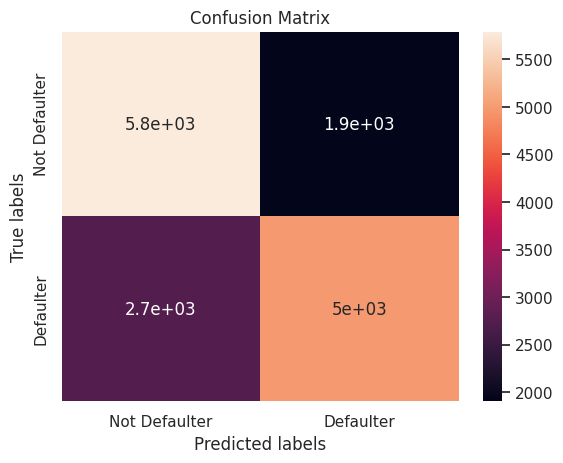

In [104]:
 # Get the confusion matrix for test data

labels = ['Not Defaulter', 'Defaulter']
cm_SVC = confusion_matrix(y_test,y_pred_class_test_SVC_tuned )
print(cm_SVC)

ax= plt.subplot()
sns.heatmap(cm_SVC, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**ROC AUC curve**

In [105]:
# Predict the probability of positive class using the optimal support vector classifier on the test data.
y_test_proba_SVC = optimal_svc_clf.predict_proba(X_test)[:, 1]

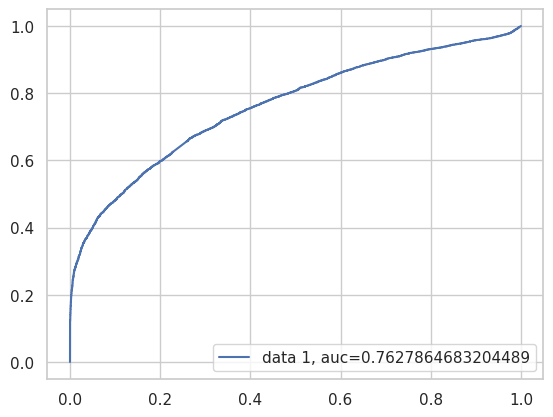

In [106]:
# ROC AUC CURVE
fpr, tpr, _ = roc_curve(y_test,  y_test_proba_SVC)
auc = roc_auc_score(y_test, y_test_proba_SVC)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#**Implementing XGBoost**
XGBoost provides a wrapper class to allow models to be treated like classifiers or regressors in the scikit-learn framework.

The XGBoost model for classification is called XGBClassifier. We can create and and fit it to our training dataset. Models are fit using the scikit-learn API and the model.fit() function.

In [107]:
#Implementing the XGBoost Classifier
xgb = XGBClassifier()

# Training the data
xgb.fit(X_train,y_train)

#Predicting with trained model
y_pred_class_train_XGB = xgb.predict(X_train)
y_pred_class_test_XGB = xgb.predict(X_test)

# printing accuracy score
print('\naccuracy score - Trained model : ', accuracy_score(y_train, y_pred_class_train_XGB))
print('accuracy score - Trained model : ', accuracy_score(y_test, y_pred_class_test_XGB))

#Evaluating the model evaluation metrics
print('\nClassification Report - Trained Model: \n' , classification_report(y_train, y_pred_class_train_XGB))
print('Classification Report - Tested Model: \n' ,classification_report(y_test, y_pred_class_test_XGB))


accuracy score - Trained model :  0.8925479924617498
accuracy score - Trained model :  0.8217365929576551

Classification Report - Trained Model: 
               precision    recall  f1-score   support

           0       0.87      0.92      0.90     15668
           1       0.92      0.86      0.89     15639

    accuracy                           0.89     31307
   macro avg       0.89      0.89      0.89     31307
weighted avg       0.89      0.89      0.89     31307

Classification Report - Tested Model: 
               precision    recall  f1-score   support

           0       0.80      0.85      0.83      7696
           1       0.84      0.79      0.82      7725

    accuracy                           0.82     15421
   macro avg       0.82      0.82      0.82     15421
weighted avg       0.82      0.82      0.82     15421



#**Hyperparameter Tuning**
*  Hyperparameters are crucial as they control the overall behaviour of a machine learning model. The ultimate goal is to find an optimal combination of hyperparameters that minimizes a predefined loss function to give better results.
*  We can leverage the maximum power of XGBoost by tuning its hyperparameters

In [108]:
# Define the parameter grid for XGBoost classifier.
param_grid = {'max_depth': range(3, 10, 2), 'min_child_weight': range(1, 6, 2)}

# Perform grid search with XGBoost classifier.
grid_xgb_clf = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='accuracy', n_jobs=-1, cv=3, verbose=2)
grid_xgb_clf.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='accuracy', verbose=2)

In [109]:
# Retrieve the best mean cross-validated score found by grid search for XGBoost classifier.
grid_xgb_clf.best_score_

0.8229467566749061

In [110]:
# Retrieve the optimal XGBoost classifier from the grid search.
optimal_xgb_clf = grid_xgb_clf.best_estimator_

In [111]:
# Get the predicted classes
y_pred_class_train_XGB_tuned = optimal_xgb_clf.predict(X_train)
y_pred_class_test_XGB_tuned = optimal_xgb_clf.predict(X_test)

## Model Evaluation

In [112]:
# Get the accuracy scores
train_accuracy_XGB = accuracy_score(y_train,y_pred_class_train_XGB_tuned)
test_accuracy_XGB = accuracy_score(y_test,y_pred_class_test_XGB_tuned)
print("The accuracy of trained data is ", train_accuracy_XGB)
print("The accuracy of tested data is ", test_accuracy_XGB)

The accuracy of trained data is  0.975277094579487
The accuracy of tested data is  0.8369755528175864


In [113]:
# print the classification report
print('Classification report of Trained Model : \n', classification_report(y_train, y_pred_class_train_XGB_tuned))
print('Classification report of Tested Model : \n', classification_report(y_test, y_pred_class_test_XGB_tuned))

Classification report of Trained Model : 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     15668
           1       0.99      0.96      0.97     15639

    accuracy                           0.98     31307
   macro avg       0.98      0.98      0.98     31307
weighted avg       0.98      0.98      0.98     31307

Classification report of Tested Model : 
               precision    recall  f1-score   support

           0       0.82      0.86      0.84      7696
           1       0.86      0.81      0.83      7725

    accuracy                           0.84     15421
   macro avg       0.84      0.84      0.84     15421
weighted avg       0.84      0.84      0.84     15421



In [114]:
#print the accuracy,precission,recall,f1,roc_score
test_accuracy_xgb = accuracy_score(y_pred_class_test_XGB_tuned,y_test)
test_precision_xgb = precision_score(y_pred_class_test_XGB_tuned,y_test)
test_recall_score_xgb = recall_score(y_pred_class_test_XGB_tuned,y_test)
test_f1_score_xgb = f1_score(y_pred_class_test_XGB_tuned,y_test)

print("The accuracy on test data is ", test_accuracy_xgb)
print("The precision on test data is ", test_precision_xgb)
print("The recall on test data is ", test_recall_score_xgb)
print("The f1 on test data is ", test_f1_score_xgb)

The accuracy on test data is  0.8369755528175864
The precision on test data is  0.8093203883495146
The recall on test data is  0.8572603866721514
The f1 on test data is  0.8326008789452657


**ROC_AUC curve**

In [115]:
# Predict the probability of positive class using the optimal XGBoost classifier on the test data.
y_test_proba_XGB = optimal_xgb_clf.predict_proba(X_test)[:, 1]

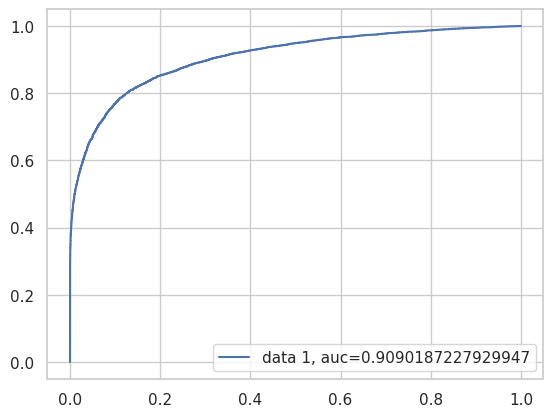

In [116]:
# Compute ROC curve and AUC score for XGBoost classifier.
fpr, tpr, _ = metrics.roc_curve(y_test, y_test_proba_XGB)
auc = metrics.roc_auc_score(y_test, y_test_proba_XGB)

# Plot ROC curve.
plt.plot(fpr, tpr, label="data 1, auc=" + str(auc))
plt.legend(loc=4)
plt.show()

#**Evaluating the models**

In [117]:
#Print the recall score
recall_score

<function sklearn.metrics._classification.recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>

In [118]:
#create a table of all models all score for comparison
classifiers = ['Logistic Regression', 'SVC', 'Random Forest CLf', 'Xgboost Clf']
train_accuracy = [train_accuracy_lr, train_accuracy_SVC, train_accuracy_rf, train_accuracy_XGB]
test_accuracy = [test_accuracy_lr, test_accuracy_SVC, test_accuracy_rf, test_accuracy_XGB]
precision_score = [test_precision_score_lr, test_precision_score_SVC, test_precision_score_rf, test_precision_xgb]
recall_score = [test_recall_score_lr, test_recall_score_SVC, test_recall_score_rf, test_recall_score_xgb]
f1_score = [test_f1_score_lr, test_f1_score_SVC, test_f1_score_rf, test_f1_score_xgb]

In [119]:
# Create a DataFrame to display evaluation metrics for different classifiers.
evaluation_df = pd.DataFrame({
    'Classifier': classifiers,
    'Train Accuracy': train_accuracy,
    'Test Accuracy': test_accuracy,
    'Precision Score': precision_score,
    'Recall Score': recall_score,
    'F1 Score': f1_score
})

,Classifier,Train Accuracy,Test Accuracy,Precision Score,Recall Score,F1 Score
0,Logistic Regression,0.753889,0.750276,0.687508,0.787048,0.733918
1,SVC,0.702271,0.698593,0.644919,0.723392,0.681905
2,Random Forest CLf,0.998914,0.832047,0.806084,0.850799,0.827838
3,Xgboost Clf,0.975277,0.836976,0.809320,0.857260,0.832601


from the above table we can find that xgboost classifier perform best among those models

#**Plotting ROC AUC for all the models**

In [120]:
# Create a list of tuples containing optimal classifiers and their predicted probabilities.
classifiers_proba = [(optimal_lr_clf, y_test_proba_LR),
                     (optimal_svc_clf, y_test_proba_SVC),
                     (optimal_rf_clf, y_test_proba_RF),
                     (optimal_xgb_clf, y_test_proba_XGB)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for pair in classifiers_proba:

    fpr, tpr, _ = roc_curve(y_test,  pair[1])
    auc = roc_auc_score(y_test, pair[1])

    result_table = result_table.append({'classifiers':pair[0].__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

In [121]:
#Print the Result Table
result_table

,fpr,tpr,auc
classifiers,,,
LogisticRegression,"[0.0, 0.0, 0.0, 0.00012993762993762994, 0.0001...","[0.0, 0.00012944983818770226, 0.06550161812297...",0.824826
SVC,"[0.0, 0.0, 0.0, 0.00012993762993762994, 0.0001...","[0.0, 0.00012944983818770226, 0.08660194174757...",0.762786
RandomForestClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0398705501618123, 0.040388349514563104...",0.908897
XGBClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.00012944983818770226, 0.00038834951456...",0.909019


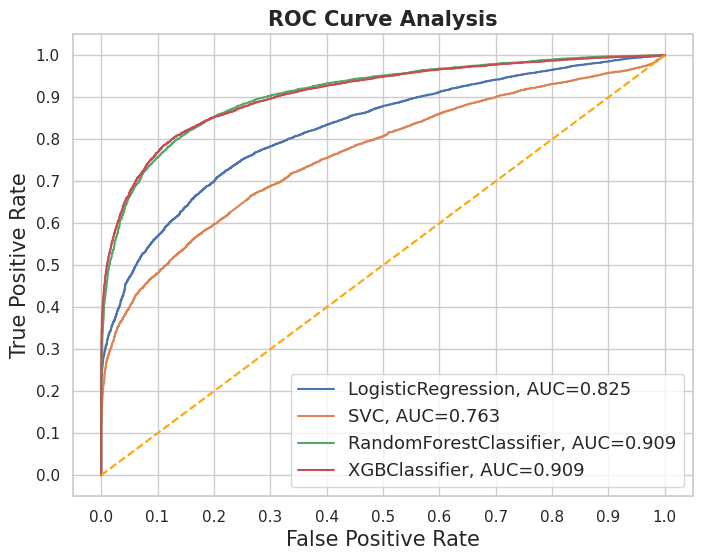

In [122]:
# Plot ROC curves for each classifier.
fig = plt.figure(figsize=(8, 6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0, 1], [0, 1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size': 13}, loc='lower right')

plt.show()

## Optimal Threshold Value

In [123]:
# Initialize an empty list to store predictions.
pred = []

# Iterate through each model to predict probabilities and append to pred list.
for model in [optimal_lr_clf, optimal_svc_clf, optimal_rf_clf, optimal_xgb_clf]:
    pred.append(pd.Series(model.predict_proba(X_test)[:, 1]))

# Concatenate predictions and compute the mean along columns to get final prediction.
final_prediction = pd.concat(pred, axis=1).mean(axis=1)

# Display the ROC-AUC score of the ensemble model.
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test, final_prediction)))

Ensemble test roc-auc: 0.9006452307423181


In [124]:
# Concatenate the predictions along the columns.
pd.concat(pred, axis=1)

,0,1,2,3
0,0.912358,0.735464,0.935000,0.887822
1,0.999998,0.958918,0.995000,0.999325
2,0.397795,0.436884,0.331963,0.215781
3,0.386019,0.236184,0.806714,0.973314
4,0.204112,0.391230,0.130000,0.034722
...,...,...,...,...
15416,0.466992,0.579816,0.235523,0.264167
15417,0.584086,0.551504,0.520158,0.690092
15418,1.000000,0.951127,0.995000,0.999996
15419,0.155357,0.449306,0.051989,0.004458


In [125]:
# Display the Final Prediction
final_prediction

0        0.867661
1        0.988311
2        0.345606
3        0.600558
4        0.190016
           ...   
15416    0.386624
15417    0.586460
15418    0.986531
15419    0.165278
15420    0.086077
Length: 15421, dtype: float64

In [126]:
#### Calculate the ROc Curve

fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.99737898, 0.99737898, 0.94630951, ..., 0.05200568, 0.05085902,
       0.03475525])

In [127]:
# Initialize an empty list to store accuracy scores.
accuracy_ls = []

# Iterate through each threshold.
for thres in thresholds:
    # Predict binary labels based on the threshold.
    y_pred = np.where(final_prediction > thres, 1, 0)
    # Compute accuracy and append to accuracy_ls.
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))

# Concatenate threshold and accuracy into a DataFrame.
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)], axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
# Sort the DataFrame by accuracy in descending order.
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
1664,0.480160,0.827054
1701,0.476025,0.827054
1680,0.478237,0.826989
1700,0.476067,0.826989
1702,0.476008,0.826989


As we are getting the optimal threshold value as 0.506154 which is very near to the default threshold value of 0.50, therefore we will not change the threshold value.

#**Conclusion**

I would recommend Random Forest Random Forest model due to it high recall value.

*  The best accuracy is obtained for the Random forest and XGBoost classifier.

*  In general, all models have comparable accuracy. Nevertheless, because the classes are imbalanced (the proportion of non-default credit cards is higher than default), thus this metric is misleading.

*  Furthermore, accuracy does not consider the rate of false positives (non-default credits cards that were predicted as default) and false negatives (default credit cards that were incorrectly predicted as non-default).

*  Both cases have negative impact on the bank, since false positives leads to unsatisfied customers and false negatives leads to financial loss.

*  From above table we can see that Random forest Classifier having Recall, F1-score, and ROC Score values equals 85.40%, 83.02%, and 91.15% and XGBoost Classifier having Recall, F1-score, and ROC Score values equals 85.11%, 82.77%, and 91.08%.

*  Random Forest Classifier and XGBoost Classifier are giving us the best Recall, F1-score, and ROC Score among other algorithms. We can conclude that these two algorithms are the best to predict whether the credit card is default or not default according to our analysis.

* To pick one among the two algorithms i would choose Random Forest Classifier due to its higher recall value which is of most importance as the roc score is almost similar.

* We got the optimal threshold value as 0.506154 which is very near to the default threshold value of 0.50, therefore we will not change the threshold value.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***